# 1. Business Understanding/ Бизнес-анализ: описание кейса.



> К нам обратился владелец небольшой сети кофеен, который планирует расширить свой бизнес и открыть несколько новых точек в течении следующих 4х месяцев. В связи с этим он хотел бы понять, как распределяются продажи по существующей сети кофеен, какие виды продукции вносят наибольший вклад в обьем продаж, кто является основным клиентом сети.

Заказчиком был предоставлен датасет с выгрузкой о транзакциях и клиентах, из его CRM системы.







**Задача: ** проанализировать полученные данные, предоставить аналитический отчет, содержащий выводы и рекомендации для заказчика, которые помогут ему для решения его бизнес-задач.

Информация предоставленная в датасете:
1. Идентификатор транзакции (transaction_id)
2.Количество единиц товара (quantity)
3.Цена за единицу товара (unit_price)
4.Информация о товаре (product_info)
5.Информация о кофейни (store_info)
6.Информация о покупателях (customer_info)



> **Формат файла** по итогам работы csv или xlsx



# 2. Data understanding /  Изучение данных

## 2.1 Импорт библиотек

In [ ]:
import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats

## 2.2 Подгрузка файла

In [ ]:
!gdown --id 1YlC4tMotZ2fkwlzIU0i266QusvboVx3h

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1YlC4tMotZ2fkwlzIU0i266QusvboVx3h
To: /content/coffee_shop_hard.csv
100% 6.36M/6.36M [00:00<00:00, 41.0MB/s]


## 2.3 Чтение файла

In [ ]:
df = pd.read_csv('coffee_shop_hard.csv')

## 2.4 Обзор датасета

In [ ]:
df.head()

,transaction_id,quantity,unit_price,product_info,store_info,customer_info
0,0,1,162.50,"{""product_id"":52,""product_name"":""Traditional B...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":558,""birthdate"":""1983-02-25"",""g..."
1,1,2,227.50,"{""product_id"":27,""product_name"":""Brazilian Lg""...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":781,""birthdate"":""1991-07-29"",""g..."
2,2,2,162.50,"{""product_id"":46,""product_name"":""Serenity Gree...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":788,""birthdate"":""1995-02-23"",""g..."
3,3,2,162.50,"{""product_id"":23,""product_name"":""Our Old Time ...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":683,""birthdate"":""1999-02-06"",""g..."
4,4,1,159.25,"{""product_id"":34,""product_name"":""Jamaican Coff...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":99,""birthdate"":""1967-01-29"",""ge..."


In [ ]:
df.sample(10)

,transaction_id,quantity,unit_price,product_info,store_info,customer_info
5359,5361,1,195.00,"{""product_id"":53,""product_name"":""Traditional B...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":98,""birthdate"":""1966-11-28"",""ge..."
6369,6372,2,130.00,"{""product_id"":22,""product_name"":""Our Old Time ...","{""sales_outlet_id"":8,""store_city"":""Moscow""}","{""customer_id"":8336,""birthdate"":""1991-01-28"",""..."
10563,11412,2,243.75,"{""product_id"":60,""product_name"":""Sustainably G...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":22,""birthdate"":""1953-12-23"",""ge..."
11138,12301,1,201.50,"{""product_id"":35,""product_name"":""Jamaican Coff...","{""sales_outlet_id"":5,""store_city"":""Москва""}","{""customer_id"":5424,""birthdate"":""1963-07-25"",""..."
14436,19028,2,162.50,"{""product_id"":23,""product_name"":""Our Old Time ...","{""sales_outlet_id"":5,""store_city"":""Москва""}","{""customer_id"":5003,""birthdate"":""1990-10-14"",""..."
16490,23684,1,494.00,"{""product_id"":20,""product_name"":""Sustainably G...","{""sales_outlet_id"":8,""store_city"":""Moscow""}","{""customer_id"":8109,""birthdate"":""1960-06-25"",""..."
2417,2417,1,130.00,"{""product_id"":22,""product_name"":""Our Old Time ...","{""sales_outlet_id"":5,""store_city"":""Москва""}","{""customer_id"":5452,""birthdate"":""1967-10-25"",""..."
22942,45729,3,195.00,"{""product_id"":49,""product_name"":""English Break...","{""sales_outlet_id"":5,""store_city"":""Москва""}","{""customer_id"":5437,""birthdate"":""2001-03-17"",""..."
22801,45221,1,227.50,"{""product_id"":27,""product_name"":""Brazilian Lg""...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":444,""birthdate"":""1968-08-10"",""g..."
17980,30002,2,162.50,"{""product_id"":48,""product_name"":""English Break...","{""sales_outlet_id"":5,""store_city"":""Москва""}","{""customer_id"":5559,""birthdate"":""1987-05-01"",""..."


In [ ]:
df.shape

(24909, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24909 entries, 0 to 24908
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  24909 non-null  int64  
 1   quantity        24909 non-null  int64  
 2   unit_price      24909 non-null  float64
 3   product_info    24909 non-null  object 
 4   store_info      24909 non-null  object 
 5   customer_info   24909 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.1+ MB


Посмотрю "запакованные колонки" поближе (customer_info, store_info, product_id)

In [ ]:
df.customer_info[4]

'{"customer_id":99,"birthdate":"1967-01-29","gender":"мужской"}'

In [ ]:
df.store_info[12]

'{"sales_outlet_id":3,"store_city":"Санкт-Петербург"}'

In [ ]:
df.product_info[0]

'{"product_id":52,"product_name":"Traditional Blend Chai Rg","product_category":"Tea"}'

## 2.5 Выявление проблем

1. Проверить датасет на дубликаты
2. Распаковать вложенные значения(product_info, store_info, customer_info)
3. Преобразовать данные в необходимый формат (birthdate)
4. Расчитать возраст клиентов,создать новый признак age
5. Другие проблемы, которые могут быть обнаружены в процессе предобработки.

# 3.Data preparation / Предобработка данных  

##3.1 Проверка и исключение дубликатов

In [ ]:
df.duplicated().sum()

57

In [ ]:
df.duplicated(subset=['transaction_id']).sum()

57

Визуально осмотрю строки, которые являются дубликатами.

In [ ]:
df[df.duplicated()]

,transaction_id,quantity,unit_price,product_info,store_info,customer_info
24852,2556,1,195.00,"{""product_id"":26,""product_name"":""Brazilian Rg""...","{""sales_outlet_id"":5,""store_city"":""Москва""}","{""customer_id"":5018,""birthdate"":""1952-07-03"",""..."
24853,21986,2,162.50,"{""product_id"":48,""product_name"":""English Break...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":136,""birthdate"":""1973-05-16"",""g..."
24854,16488,1,162.50,"{""product_id"":54,""product_name"":""Morning Sunri...","{""sales_outlet_id"":8,""store_city"":""Moscow""}","{""customer_id"":8349,""birthdate"":""2000-12-31"",""..."
24855,42306,3,162.50,"{""product_id"":23,""product_name"":""Our Old Time ...","{""sales_outlet_id"":5,""store_city"":""Москва""}","{""customer_id"":5600,""birthdate"":""1975-01-17"",""..."
24856,37086,3,195.00,"{""product_id"":53,""product_name"":""Traditional B...","{""sales_outlet_id"":5,""store_city"":""Москва""}","{""customer_id"":5224,""birthdate"":""1994-03-08"",""..."
24857,5890,2,162.50,"{""product_id"":52,""product_name"":""Traditional B...","{""sales_outlet_id"":5,""store_city"":""Москва""}","{""customer_id"":5081,""birthdate"":""1992-11-26"",""..."
24858,983,2,243.75,"{""product_id"":38,""product_name"":""Latte"",""produ...","{""sales_outlet_id"":5,""store_city"":""Москва""}","{""customer_id"":5940,""birthdate"":""1965-11-21"",""..."
24859,1757,1,162.50,"{""product_id"":50,""product_name"":""Earl Grey Rg""...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":504,""birthdate"":""1976-04-06"",""g..."
24860,41388,1,292.50,"{""product_id"":78,""product_name"":""Scottish Crea...","{""sales_outlet_id"":8,""store_city"":""Moscow""}","{""customer_id"":8174,""birthdate"":""1957-05-12"",""..."
24861,986,1,162.50,"{""product_id"":44,""product_name"":""Peppermint Rg...","{""sales_outlet_id"":5,""store_city"":""Москва""}","{""customer_id"":5473,""birthdate"":""1959-04-23"",""..."


Возьму любой индекс из дубликатов и визуально оценю(осмотрю) дубликат. Действительно у значения, признака transaction_id, 2556 есть такой же дубликат.

In [ ]:
df[df.transaction_id==2556]

,transaction_id,quantity,unit_price,product_info,store_info,customer_info
2556,2556,1,195.0,"{""product_id"":26,""product_name"":""Brazilian Rg""...","{""sales_outlet_id"":5,""store_city"":""Москва""}","{""customer_id"":5018,""birthdate"":""1952-07-03"",""..."
24852,2556,1,195.0,"{""product_id"":26,""product_name"":""Brazilian Rg""...","{""sales_outlet_id"":5,""store_city"":""Москва""}","{""customer_id"":5018,""birthdate"":""1952-07-03"",""..."


In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.drop_duplicates(inplace=True)

In [ ]:
df_copy.shape

(24852, 6)

In [ ]:
24909-24852 #1е число было наблюдений, 2е число кол-во наблюдений на данный момент

57

##3.2 Распаковка вложенный структур данных

### 'product_info'

In [ ]:
df_copy.product_info[0]

'{"product_id":52,"product_name":"Traditional Blend Chai Rg","product_category":"Tea"}'

In [ ]:
json.loads(df_copy.product_info[0])['product_id']

52

In [ ]:
def product_id(text):
  return json.loads(text)['product_id']

def product_name(text):
  return json.loads(text)['product_name']

def product_category(text):
  return json.loads(text)['product_category']

In [ ]:
df_copy['product_id'] = df_copy['product_info'].apply(product_id)

In [ ]:
df_copy['product_name'] = df_copy['product_info'].apply(product_name)

In [ ]:
df_copy['product_category'] = df_copy['product_info'].apply(product_category)

In [ ]:
df_copy['product_category']

,product_category
0,Tea
1,Coffee
2,Tea
3,Coffee
4,Coffee
...,...
24847,Coffee
24848,Coffee
24849,Coffee
24850,Tea


In [ ]:
df_copy['product_category'].value_counts()

,count
product_category,
Coffee,9948
Tea,7866
Bakery,3780
Drinking Chocolate,1955
Flavours,782
Coffee beans,217
Loose Tea,155
Branded,82
Packaged Chocolate,67


In [ ]:
name_sort = df_copy[df_copy['product_category'].isin(['Tea','Coffee'])]['product_name'].value_counts()[:10]

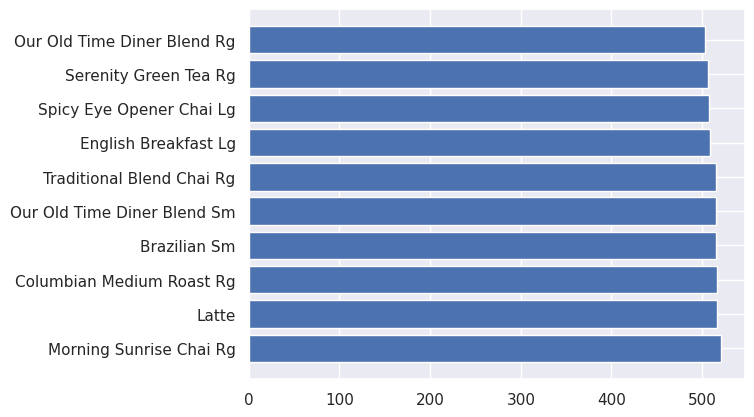

In [ ]:
plt.barh(name_sort.index, name_sort.values)
plt.show()

In [ ]:
df_copy.columns

Index(['transaction_id', 'quantity', 'unit_price', 'product_info',
       'store_info', 'customer_info', 'product_id', 'product_name',
       'product_category'],
      dtype='object')

In [ ]:
df_copy.shape

(24852, 9)

### 'store_info'

In [ ]:
df_copy.store_info

,store_info
0,"{""sales_outlet_id"":3,""store_city"":""Санкт-Петер..."
1,"{""sales_outlet_id"":3,""store_city"":""Санкт-Петер..."
2,"{""sales_outlet_id"":3,""store_city"":""Санкт-Петер..."
3,"{""sales_outlet_id"":3,""store_city"":""Санкт-Петер..."
4,"{""sales_outlet_id"":3,""store_city"":""Санкт-Петер..."
...,...
24847,"{""sales_outlet_id"":8,""store_city"":""Moscow""}"
24848,"{""sales_outlet_id"":8,""store_city"":""Moscow""}"
24849,"{""sales_outlet_id"":8,""store_city"":""Moscow""}"
24850,"{""sales_outlet_id"":8,""store_city"":""Moscow""}"


In [ ]:
def store_city(store_info):
  return json.loads(store_info)['store_city']

In [ ]:
df_copy['store_city'] = df_copy['store_info'].apply(store_city)

In [ ]:
df_copy.columns

Index(['transaction_id', 'quantity', 'unit_price', 'product_info',
       'store_info', 'customer_info', 'product_id', 'product_name',
       'product_category', 'store_city'],
      dtype='object')

In [ ]:
df_copy.head(3)

,transaction_id,quantity,unit_price,product_info,store_info,customer_info,product_id,product_name,product_category,store_city
0,0,1,162.5,"{""product_id"":52,""product_name"":""Traditional B...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":558,""birthdate"":""1983-02-25"",""g...",52,Traditional Blend Chai Rg,Tea,Санкт-Петербург
1,1,2,227.5,"{""product_id"":27,""product_name"":""Brazilian Lg""...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":781,""birthdate"":""1991-07-29"",""g...",27,Brazilian Lg,Coffee,Санкт-Петербург
2,2,2,162.5,"{""product_id"":46,""product_name"":""Serenity Gree...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":788,""birthdate"":""1995-02-23"",""g...",46,Serenity Green Tea Rg,Tea,Санкт-Петербург


### 'customer_info'

In [ ]:
df_copy.customer_info

,customer_info
0,"{""customer_id"":558,""birthdate"":""1983-02-25"",""g..."
1,"{""customer_id"":781,""birthdate"":""1991-07-29"",""g..."
2,"{""customer_id"":788,""birthdate"":""1995-02-23"",""g..."
3,"{""customer_id"":683,""birthdate"":""1999-02-06"",""g..."
4,"{""customer_id"":99,""birthdate"":""1967-01-29"",""ge..."
...,...
24847,"{""customer_id"":8026,""birthdate"":""1962-10-25"",""..."
24848,"{""customer_id"":8401,""birthdate"":""1954-11-05"",""..."
24849,"{""customer_id"":8412,""birthdate"":""1953-09-16"",""..."
24850,"{""customer_id"":8030,""birthdate"":""1994-01-10"",""..."


In [ ]:
df_copy.customer_info[0]

'{"customer_id":558,"birthdate":"1983-02-25","gender":"женский"}'

In [ ]:
df_copy['birthdate'] = df_copy['customer_info'].apply(lambda x: json.loads(x)['birthdate'])
df_copy['gender'] = df_copy['customer_info'].apply(lambda x: json.loads(x)['gender'])

In [ ]:
df_copy.columns

Index(['transaction_id', 'quantity', 'unit_price', 'product_info',
       'store_info', 'customer_info', 'product_id', 'product_name',
       'product_category', 'store_city', 'birthdate', 'gender'],
      dtype='object')

In [ ]:
print(df_copy['customer_info'][0])
print(df_copy['customer_info'][1])
print(df_copy['customer_info'][2])


{"customer_id":558,"birthdate":"1983-02-25","gender":"женский"}
{"customer_id":781,"birthdate":"1991-07-29","gender":"не указан"}
{"customer_id":788,"birthdate":"1995-02-23","gender":"не указан"}


In [ ]:
df_copy[['customer_info', 'birthdate', 'gender']]

,customer_info,birthdate,gender
0,"{""customer_id"":558,""birthdate"":""1983-02-25"",""g...",1983-02-25,женский
1,"{""customer_id"":781,""birthdate"":""1991-07-29"",""g...",1991-07-29,не указан
2,"{""customer_id"":788,""birthdate"":""1995-02-23"",""g...",1995-02-23,не указан
3,"{""customer_id"":683,""birthdate"":""1999-02-06"",""g...",1999-02-06,женский
4,"{""customer_id"":99,""birthdate"":""1967-01-29"",""ge...",1967-01-29,мужской
...,...,...,...
24847,"{""customer_id"":8026,""birthdate"":""1962-10-25"",""...",1962-10-25,мужской
24848,"{""customer_id"":8401,""birthdate"":""1954-11-05"",""...",1954-11-05,мужской
24849,"{""customer_id"":8412,""birthdate"":""1953-09-16"",""...",1953-09-16,мужской
24850,"{""customer_id"":8030,""birthdate"":""1994-01-10"",""...",1994-01-10,женский


In [ ]:
df_copy.shape

(24852, 12)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24852 entries, 0 to 24851
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    24852 non-null  int64  
 1   quantity          24852 non-null  int64  
 2   unit_price        24852 non-null  float64
 3   product_info      24852 non-null  object 
 4   store_info        24852 non-null  object 
 5   customer_info     24852 non-null  object 
 6   product_id        24852 non-null  int64  
 7   product_name      24852 non-null  object 
 8   product_category  24852 non-null  object 
 9   store_city        24852 non-null  object 
 10  birthdate         24852 non-null  object 
 11  gender            24852 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 3.0+ MB


## 3.3 Преобразование данных в необходимый формат

### 'age'

In [ ]:
df_copy['birthdate'] = pd.to_datetime(df_copy.birthdate)

In [ ]:
df_copy.birthdate.tail(3)

,birthdate
24849,1953-09-16
24850,1994-01-10
24851,1994-01-10


## 3.4 Расчет дополнительный признаков

### 'age'

Расчитаю возраст на основе колонки birthdate

In [ ]:
#создаю сегодняшнюю дату и достаю год, атрибутом year
#создаю новую колонку 'age'
today = pd.Timestamp.today().year
df_copy['age'] = today - df_copy.birthdate.apply(lambda x: x.year)

In [ ]:
#контролирую результат
df_copy.age

,age
0,41
1,33
2,29
3,25
4,57
...,...
24847,62
24848,70
24849,71
24850,30


In [ ]:
df_copy.columns

Index(['transaction_id', 'quantity', 'unit_price', 'product_info',
       'store_info', 'customer_info', 'product_id', 'product_name',
       'product_category', 'store_city', 'birthdate', 'gender', 'age'],
      dtype='object')

In [ ]:
df_copy.tail(3)

,transaction_id,quantity,unit_price,product_info,store_info,customer_info,product_id,product_name,product_category,store_city,birthdate,gender,age
24849,49890,2,143.0,"{""product_id"":25,""product_name"":""Brazilian Sm""...","{""sales_outlet_id"":8,""store_city"":""Moscow""}","{""customer_id"":8412,""birthdate"":""1953-09-16"",""...",25,Brazilian Sm,Coffee,Moscow,1953-09-16,мужской,71
24850,49892,2,162.5,"{""product_id"":44,""product_name"":""Peppermint Rg...","{""sales_outlet_id"":8,""store_city"":""Moscow""}","{""customer_id"":8030,""birthdate"":""1994-01-10"",""...",44,Peppermint Rg,Tea,Moscow,1994-01-10,женский,30
24851,49893,1,227.5,"{""product_id"":75,""product_name"":""Croissant"",""p...","{""sales_outlet_id"":8,""store_city"":""Moscow""}","{""customer_id"":8030,""birthdate"":""1994-01-10"",""...",75,Croissant,Bakery,Moscow,1994-01-10,женский,30


## 3.6 Форматирование текстовых данных

### 'store_city'

In [ ]:
#смотрю количество уникальный значений признака 'store_city'
df_copy.store_city.value_counts()

,count
store_city,
Санкт-Петербург,8593
Москва,8545
Moscow,7714


In [ ]:
#заменяю 'Moscow' на 'Москва'
df_copy.loc[df_copy.store_city == 'Moscow','store_city'] = 'Москва'

In [ ]:
#контролирую результат
df_copy.store_city.value_counts()

,count
store_city,
Москва,16259
Санкт-Петербург,8593


In [ ]:
#По окончанию всех преобразований удалю лишние столбцы
columns = ['transaction_id', 'store_info', 'customer_info','birthdate','product_id','product_info']
df_copy2 = df_copy.copy()
df_copy2.drop(columns=columns, inplace=True)

In [ ]:
df_copy2.reset_index(drop=True, inplace=True)

## 3.7 Проверка и сохранение датасета

In [ ]:
df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24852 entries, 0 to 24851
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   quantity          24852 non-null  int64  
 1   unit_price        24852 non-null  float64
 2   product_name      24852 non-null  object 
 3   product_category  24852 non-null  object 
 4   store_city        24852 non-null  object 
 5   gender            24852 non-null  object 
 6   age               24852 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.3+ MB


In [ ]:
df_copy2.shape

(24852, 7)

In [ ]:
df_copy2.head(3)

,quantity,unit_price,product_name,product_category,store_city,gender,age
0,1,162.5,Traditional Blend Chai Rg,Tea,Санкт-Петербург,женский,41
1,2,227.5,Brazilian Lg,Coffee,Санкт-Петербург,не указан,33
2,2,162.5,Serenity Green Tea Rg,Tea,Санкт-Петербург,не указан,29


In [ ]:
#сохраняю очищенный датасет в формат csv
df_copy2.to_csv('df_coffee_clean.csv')

In [ ]:
#сохраняю очищенный датасет в формат xlsx
df_copy2.to_excel('df_coffee_clean.xlsx', index=False)

## 3.8 Выводы по разделу / conclusions on the section

1. Заказчиком был предоставлен датасет с выгрузкой о транзакциях и клиентах, из его CRM системы, состоящий из 24909 наблюдений (строк) и 6 признаков(колонок)
2. В ходе очистки датасета были внесены следущие изменения:
* исключены полные дубликаты (ошибочно задвоенные записи) 57 строк
* исключены некоторые признаки не представляющие ценности в ходе их распаковки
3. Были распакованы полуструктурированные данные в формате json ('product_info','store_info','customer_info')
4. Создан новый признак 'age' на основе даты рождения
5. Отформатированы и унифицированы значения 'store_city' для корректного анализа
6. Сохранение датасета в двух удобных форматах csv и xlsx.

#4. Modeling / Анализ данных

Цель анализа- ответить на вопросы:
1. Как распределяются продажи по существующей сети кофеен?
2. Какие виды продукции вносят наибольший вклад в обьем продаж?
3. Кто явялется основным клиентом сети? (составить портреты посетителей)

Определяю типы переменных
1. Количественные признаки: Непрерывные('age','unit_price'); Дискретный('quantity')
2. Категориальные признаки: 'gender', 'store_city', 'product_name','product_category'

Целевые признаки: информация о продукте и о клиентах кофейни

## 4.1 Количественные признаки

###'quantity'/ количество

In [ ]:
df.quantity.value_counts()

,count
quantity,
1,14450
2,10077
3,376
4,5
8,1


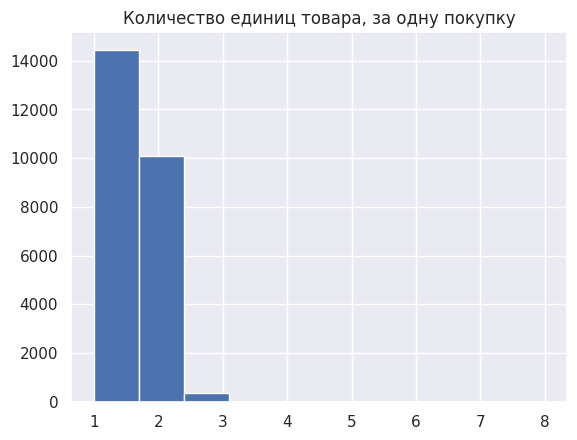

In [ ]:
plt.hist(df.quantity)
plt.title('Количество единиц товара, за одну покупку')
plt.show()

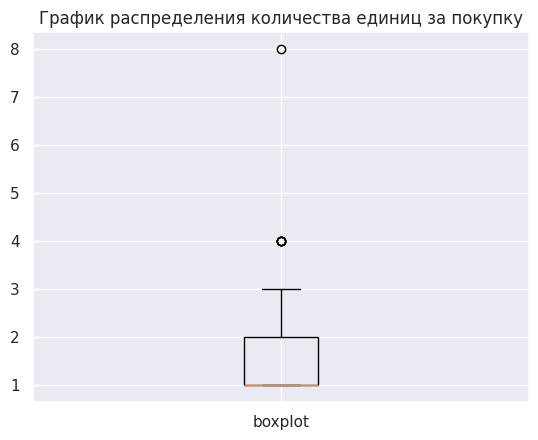

In [ ]:
plt.boxplot(df_copy2.quantity, labels=['boxplot'])
plt.title('График распределения количества единиц за покупку')
plt.show()

In [ ]:
print(f'Коэфициент ассиметрии {df_copy2.quantity.skew()}')
print(f'Коэффициент эксцесса {df_copy2.quantity.kurtosis()}')

Коэфициент ассиметрии 0.6600636978478897
Коэффициент эксцесса 0.028632968351492316


Для признака quantity, который является дискретным, не корретно будет делать какие-то выводы о статистических показателях.

Выводы:
1. В данном датасете представлены данные о транзакциях покупателей. Колонка quantity показывает сколько позиций совершает покупатель за одну покупку.
2. На гистограмме изображено количество товара, которое совершает покупатель за один раз. На ней видно, что чаще всего это одна позиция и две. Также в магазинах были покупки в 3, 4 и 8 позиций, что является не значительной величиной.
3. На диаграмме boxplot так же мы видим, что основная масса данных приходится на значение 1 и 2. 3 является границей боксплот. 4 и 8 являются выбросами.

### 'age'/ возраст

In [ ]:
print(f'Наименьший возраст {df_copy2.age.min()}')
print(f'Наибольший возраст {df_copy2.age.max()}')
print(f'Средний возраст {round(df_copy2.age.mean(), 2)}')
print(f'Медианный возраст {df_copy2.age.median()}')

Наименьший возраст 23
Наибольший возраст 74
Средний возраст 45.75
Медианный возраст 43.0


In [ ]:
print(f'10й перцентиль равен {df_copy2.age.quantile(0.1)}')
print(f'90й перцентиль равен {df_copy2.age.quantile(0.9)}')

10й перцентиль равен 27.0
90й перцентиль равен 68.0


In [ ]:
df_copy2.age.describe()

,age
count,24852.000000
mean,45.747545
std,15.091661
min,23.000000
25%,32.000000
50%,43.000000
75%,59.000000
max,74.000000


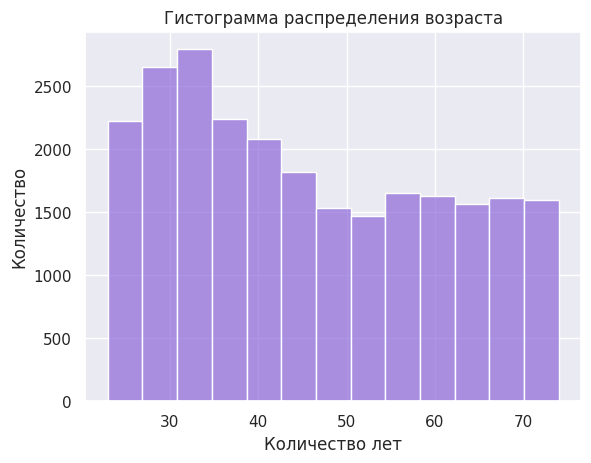

In [ ]:
sns.set()
sns.histplot(df_copy2.age, bins=13, color='mediumpurple')
plt.title("Гистограмма распределения возраста")
plt.xlabel('Количество лет')
plt.ylabel("Количество")
plt.show()

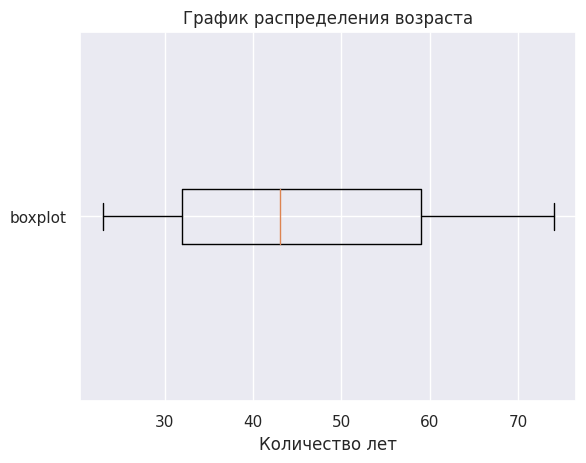

In [ ]:
plt.boxplot(df_copy2.age, labels=['boxplot'], vert=False)
plt.title("График распределения возраста")
plt.xlabel('Количество лет')
plt.show()

In [ ]:
print(f'Коэффициет ассиметрии {df_copy2.age.skew()}')
print(f'Коэффициет эксцесса {df_copy2.age.kurtosis()}')

Коэффициет ассиметрии 0.28079911169022514
Коэффициет эксцесса -1.2071866113302654


In [ ]:
print(f'Критерий Шапиро-Уилка {(stats.shapiro(df_copy2.age))[0:2]}')

Критерий Шапиро-Уилка (0.9367827586086567, 2.143684245955646e-71)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 24852.
  res = hypotest_fun_out(*samples, **kwds)


Выводы:
1. Минимальный возраст в выборке- 23, максимальный- 74. Размах значений составляет 54 года, полагаю, что данные достоверны и выбросов- аномальных значений возраста нет.
2. Нулевых значений нет- предобработка не требуется.
3. Средний возраст составил- 45 лет, а медианный 43 года. Это значит, что данные распределены равномерно. Значения медианного и среднего возраста близки.
4. 25% выборки не превышает-32 лет, а 75%- 59 лет. Большая часть клиентов коффейни, явяляются люди зрелого возрастного периода.
5. Гистограмма распределения признака имеет вид, скошенного вправо. Пики приходятся на возраст около 32 лет, затем волна графика идет вниз, на отметке около 53 лет движение вниз останавливается и уходит в горизонтальном направлении. На боксплот основная масса возраста приходится начиная с 32 и до 59 лет, соответственно Q1 и Q3.
6. Проведен тест на нормальность распределения выборки: Шапиро-Уилка. Коэффициент ассиметрии имеет значение A>0, что говорит о скошенности графика влево. Что мы и видем на гистограмме. Коэффициент эксцесса принимает отрицательные значения, следовательно график имеет плосковершинную форму. Гипотеза H1: наблюдаемая выборка не принадлежит нормальной генеральной совокупности.Соответственно в дальнейшем при анализе взаимосвязи признаков следует применять непараметрические критерии сравнения групп: для 2х независимых групп - критерий Манна-Уитни, для более 2х независимых групп - критерий Краскала-Уоллиса.

### 'unit_price'/ цена за единицу

In [ ]:
print(f'Минимальная цена за единицу товара: {df_copy2.unit_price.min()}')
print(f'Максимальная цена за единицу товара: {df_copy2.unit_price.max()}')

Минимальная цена за единицу товара: 52.0
Максимальная цена за единицу товара: 2925.0


In [ ]:
df_copy2.unit_price.describe()

,unit_price
count,24852.000000
mean,215.345534
std,148.537146
min,52.000000
25%,162.500000
50%,195.000000
75%,243.750000
max,2925.000000


In [ ]:
print(f'10й перцентиль равен: {df_copy2.unit_price.quantile(0.1)}')
print(f'90й перцентиль равен: {df_copy2.unit_price.quantile(0.9)}')

10й перцентиль равен: 143.0
90й перцентиль равен: 276.25


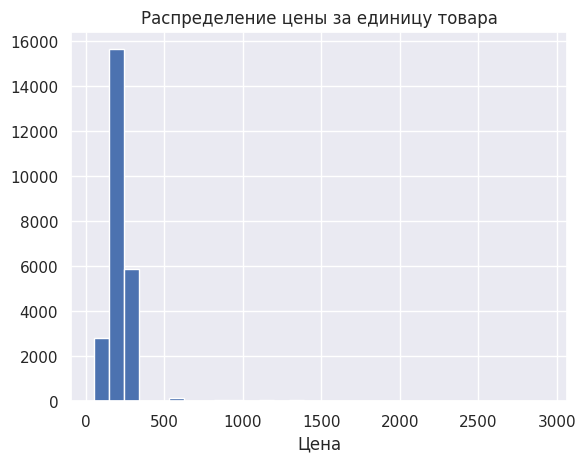

In [ ]:
plt.hist(df_copy2.unit_price, bins=30, )
plt.title('Распределение цены за единицу товара')
plt.xlabel('Цена')
plt.show()

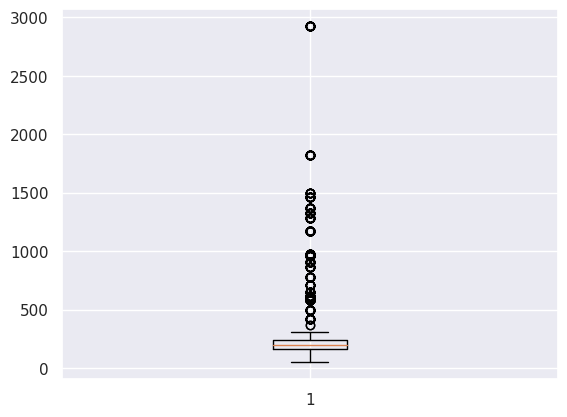

In [ ]:
plt.boxplot(df_copy2.unit_price)
plt.show()

Создам еще один боксплот, ограничив датасет 99м процентилем и 3м процентилем.(т.е я убираю 1 перцентиль выборки сверху и 3 перцентиля выборки снизу, чтобы посмотреть основную массу данных)

In [ ]:
df_filt = df_copy2[(df_copy2.unit_price<df_copy2.unit_price.quantile(0.99))&(df_copy2.unit_price>df_copy2.unit_price.quantile(0.03))] #создаю переменную содержащую фильтрованный датасет

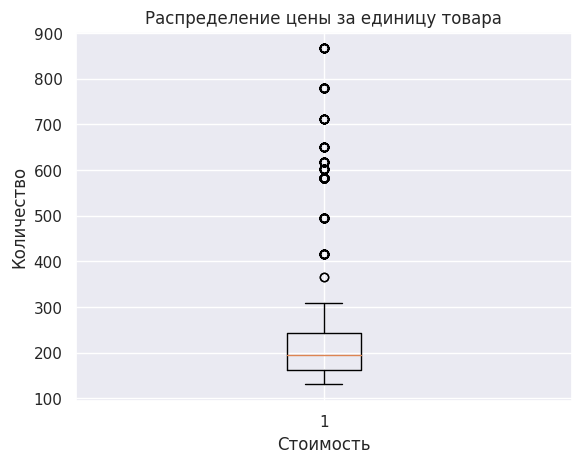

In [ ]:
plt.boxplot(df_filt.unit_price)
plt.title('Распределение цены за единицу товара')
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.show()

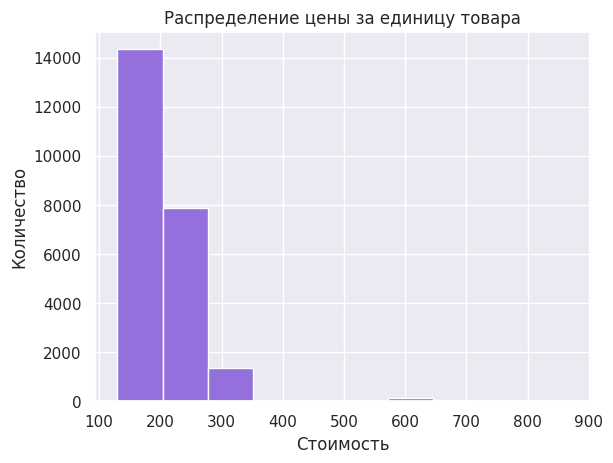

In [ ]:
plt.hist(df_filt.unit_price, color='mediumpurple')
plt.title('Распределение цены за единицу товара')
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.show()

In [ ]:
print(f'Коэффициент ассиметрии: {df_copy2.unit_price.skew()}')
print(f'Коэффициент эксцесса: {df_copy2.unit_price.kurtosis()}')

Коэффициент ассиметрии: 9.656030592429309
Коэффициент эксцесса: 132.485589705823


In [ ]:
stats.shapiro(df_copy2.unit_price)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 24852.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.3626154512241738, pvalue=3.614795659689535e-129)

Выводы:
1. Максимальное значение 2925.00, минимальное 52.00 разница в 2873, что довольно существенно в сравнении основного обьема данных выборки. Это связано с типом продаваемого товара.
2. Среднее значение 215, а медианное 195. Различия медианного от среднего не большое, скошенность графика опредляется слева. Среднее уравнивается относительно медианного, за счет небольшого количества выбросов, которые сильно отличаются от большей части наблюдений.
3. 10й перцентиль равен 143, а 90й- 276, это говорит об основной массе значений, которые содержаться в датасете. Значения колеблятся от 143 до 276.
4. Для визуализации была построена гистограмма и боксплот. т.к в выборки встречались выбросы, то большая часть гистограммы кажется пустой, количество таких высоких значений в датасет невелико,поэтому на графике просматриваются плохо, поэтому был создан фильтр ограничивающий выборку с 3 по 99 перцентиль. График гистограммы имеет вид скошенного влевой части, есть пик который приходится на цену от около 140 до 200. На боксплот видно, что коробочка обозначена на значениях от 140 до 250, соответствуюя 2 и 3му квартилю внутри нее. Все что выше 310 на графике помечено выбросами.
5. Коэффициент ассиметрии A>0, график скошен влево. Коэффициент эксцесса Ex>0- график имеет островершинную форму. Это подтверждается на визуализации. Тест Шапиро-Уилка показал, что наблюдаемая выборка не принадлежит к нормальной генерации совокупностей. Гипотеза H1.


### 'full_pay' / весь чек

In [ ]:
df_copy2['full_pay'] = df_copy2['quantity'] * df_copy2['unit_price'] #создам еще одну колонку

In [ ]:
full = df_copy2.full_pay

In [ ]:
df_copy2.full_pay

,full_pay
0,162.50
1,455.00
2,325.00
3,325.00
4,159.25
...,...
24847,276.25
24848,136.50
24849,286.00
24850,325.00


In [ ]:
print(f'Максимальный чек : {full.max()}')
print(f'Минимальный чек : {full.min()}')
print(f'Медианный чек : {full.median()}')
print(f'Средний чек : {full.mean()}')
print(f'Описательная статистика признака \'full_pay\' \n{full.describe()}')

Максимальный чек : 23400.0
Минимальный чек : 52.0
Медианный чек : 243.75
Средний чек : 299.6138017061001
Описательная статистика признака 'full_pay' 
count    24852.000000
mean       299.613802
std        230.478316
min         52.000000
25%        195.000000
50%        243.750000
75%        390.000000
max      23400.000000
Name: full_pay, dtype: float64


In [ ]:
q1 = full.quantile(0.1)
q9 = full.quantile(0.9)
print(f'10й перцентиль {q1}')
print(f'90й перцентиль {q9}')

10й перцентиль 162.5
90й перцентиль 487.5


Гистограмма отделена 10м и 90м перцентилем, т.к выбросы слишком большие

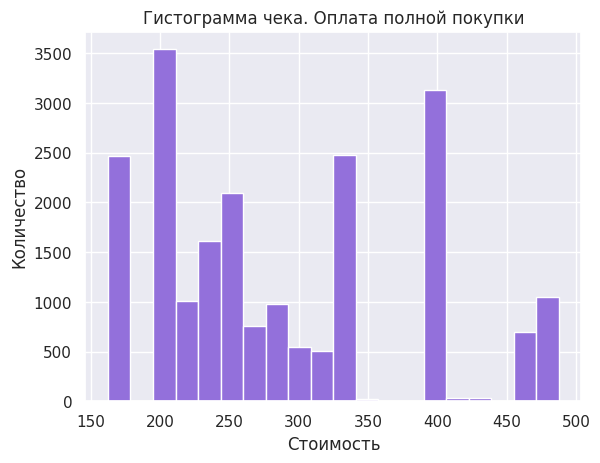

In [ ]:
plt.hist(df_copy2[(df_copy2['full_pay'] >= q1)&(df_copy2['full_pay'] <= q9)]['full_pay'], color='mediumpurple', bins=20)
plt.title('Гистограмма чека. Оплата полной покупки')
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.show()

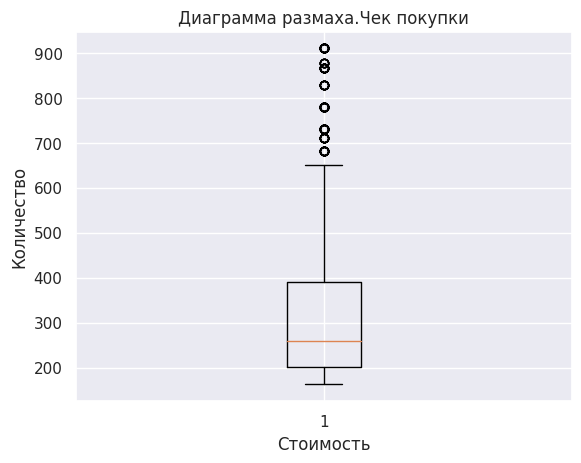

In [ ]:
plt.boxplot(df_copy2[(df_copy2['full_pay'] >= q1)&(df_copy2['full_pay'] <= full.quantile(0.99))]['full_pay'])
plt.title('Диаграмма размаха.Чек покупки')
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.show()

In [ ]:
print(f'Коэффициент ассиметрии: {full.skew()}')
print(f'Коэффициент эксцесса: {full.kurtosis()}')

Коэффициент ассиметрии: 42.78939877061505
Коэффициент эксцесса: 4078.4805867241903


In [ ]:
stats.shapiro(full)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 24852.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.43703777099547914, pvalue=1.2670906401060546e-125)

Выводы:
1. Максимальный чек 23400, минимальный 52, большой размах, имеются выбросы.
2. Медианный чек 243, а средний 299. Показатели почти одинаковые.
3. 10% выборки не превышают 162, 25% не превышают 195, 75% не превышают 390, и 90% выборки не превышают 487. Что подтверждает выбросы тк максимальное сильно отличается.
4. Гистограмма построена с ограниченийем в 10й и 90й процентиль. График скошен влево. Боксплот так же ограничен 10м и 99м процентилем.
5. График скошен влево, имеет островершинную форму. Что подтверждается тестами. Гипотеза H1. Тест Шапиро-Уилка показал, что выборка не принадлежит к нормальной генерации совокупностей.

## 4.2 Категориальные признаки

### 'gender'/ пол

In [ ]:
df_copy2.gender.describe()

,gender
count,24852
unique,3
top,женский
freq,10851


In [ ]:
df_copy2.gender.value_counts()

,count
gender,
женский,10851
мужской,8222
не указан,5779


In [ ]:
df_copy2.gender.mode()

,gender
0,женский


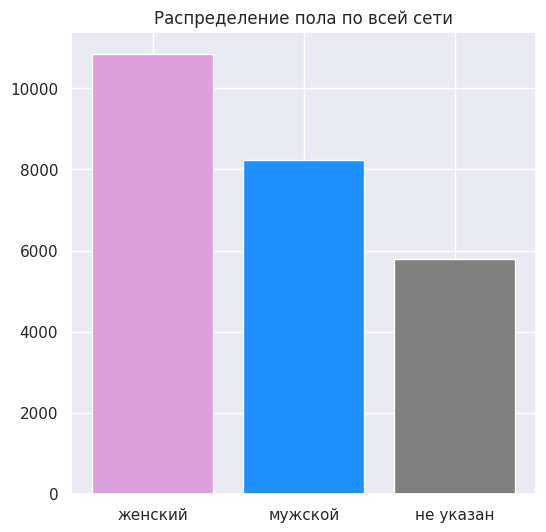

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
ax.bar(df_copy2.gender.value_counts().index, df_copy2.gender.value_counts().values, color=['plum','dodgerblue','gray'])
plt.title('Распределение пола по всей сети')
plt.show()

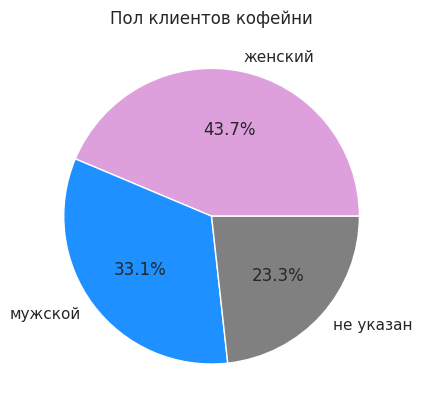

In [ ]:
plt.pie(df_copy2.gender.value_counts().values,
        labels=df_copy2.gender.value_counts().index,
        autopct='%1.1f%%',
        colors=['plum','dodgerblue','gray'])
plt.title('Пол клиентов кофейни')
plt.show()

Выводы:
1. Количество уникальных значений пола 3: мужской, женский и те, кто пол не указали.
2. 23% клиентов сети кофеен не указали пол. По имеющимся данным, можно сказать, что большая часть клиентов кофеен это женщины- 44%. Мужчины составили 33%.
3. Т.к разница не большая, между мужчинами и женщинами, а также учесть, что 23% пол не указали, нельзя говорить наверняка о том, что основным клиентом сети являеются больше женщины, чем мужчины.

### 'store_city'

In [ ]:
df_copy2.store_city.describe()

,store_city
count,24852
unique,2
top,Москва
freq,16259


In [ ]:
df_copy2.store_city.value_counts()

,count
store_city,
Москва,16259
Санкт-Петербург,8593


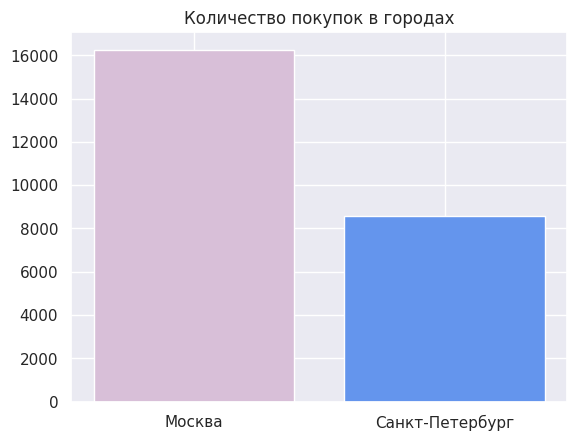

In [ ]:
city = df_copy2.store_city.value_counts()
plt.bar(city.index, city.values, color=['thistle', 'cornflowerblue'])
plt.title('Количество покупок в городах')
plt.show()

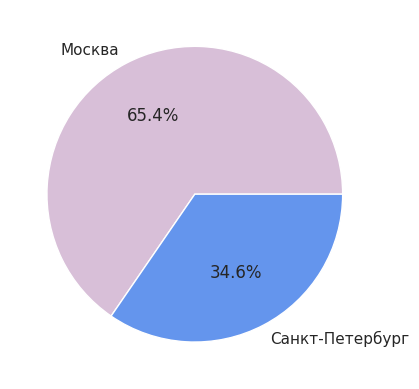

In [ ]:
plt.pie(city.values, labels=city.index, autopct='%1.1f%%', colors=['thistle', 'cornflowerblue'])
plt.show()

Выводы:
1. Уникальных значений признака store_city =2, Москва и Санкт-Петербург
2. В Москве, клиенты кофеен совершают покупки чаще, чем в Санкт-Петегрубге. Соотношение примерно 2:1 (65% в Москве, 35% Санкт-Петербург). (Возможно, что точек кофеен в Москве больше, далее сгрупирую город с id кофейни,для уточнения этого предположения, чтобы сделать вывод о принадлежности популярности кофейни к городу, по имеющимся данным можно пока сказать, что в Москве покупатели совершают покупок вдвое больше, чем во втором городе)

По ходу работы было принято решение создать доп.признак с id торговой точки, чтобы посмотреть сколько точек есть в каждом городе, еще раз простроить графики.

#### 'city_id'

In [ ]:
def city_id(data):
  return json.loads(data)['sales_outlet_id']
df_copy2['city_id'] = df.store_info.apply(city_id)

In [ ]:
df_copy2['city_id'].value_counts()

,count
city_id,
3,8593
5,8545
8,7714


In [ ]:
city_id = df_copy2.groupby('store_city')['city_id'].value_counts()
city_id = city_id.sort_values()

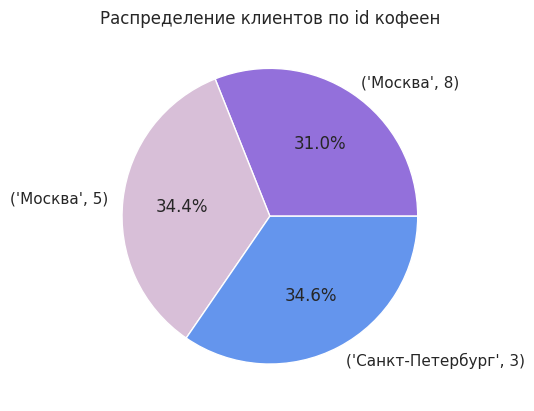

In [ ]:
plt.pie(city_id.values, labels=city_id.index, autopct='%1.1f%%', colors=['mediumpurple','thistle', 'cornflowerblue'])
plt.title('Распределение клиентов по id кофеен')
plt.show()

In [ ]:
store_id = []
for i in city_id.index:
  s = list(i)
  store_id.append(' '.join(map(str, s)))

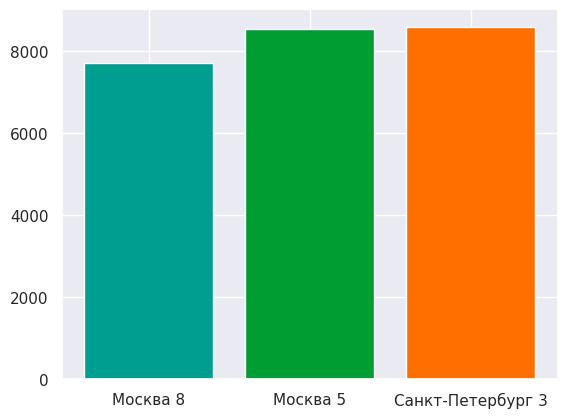

In [ ]:
plt.bar(store_id, city_id.values, color=['#009D91','#009D32', '#FF6F00'])
plt.show()

Выводы:
1. Уникальных значений признака 3. Москва 8, Москва 5, Санкт-Петербург 3. Следвательно в Москве находится две точки кофеен, а Санкт-Петербурге- одна.
3. Магазин в Санкт-Петербурге является популярнее на 0.2%, чем Москва 5, и на  3.6%, чем Москва 8.

### 'product_name'

In [ ]:
name = df_copy2.product_name

In [ ]:
name.value_counts().values
f5 = 0
f4 = 0
f3 = 0
f2 = 0
f1 = 0
f_100 = 0
for i in name.value_counts().values:
  if i >= 500:
    f5 +=1
  elif i < 500 and i >= 400:
    f4 +=1
  elif i < 400 and i >= 300:
    f3+=1
  elif i <300 and i>=200:
    f2+=1
  elif i < 200 and i>=100:
    f1+=1
  else:
    f_100 +=1
print(f5,f4,f3,f2,f1,f_100)

14 27 11 1 3 24


In [ ]:
print(f'{len(name.value_counts()[name.value_counts().values>500])} позиций, встречаются в датасет более 500 раз')
print(f'{len(name.value_counts()[name.value_counts().values>400])} позиций, встречаются в датасет более 400 раз')
print(f'{len(name.value_counts()[name.value_counts().values>300])} позиций, встречаются в датасет более 300 раз')
print(f'{len(name.value_counts()[name.value_counts().values>200])} позиций, встречаются в датасет более 200 раз')
print(f'{len(name.value_counts()[name.value_counts().values>100])} позиций, встречаются в датасет более 100 раз')

14 позиций, встречаются в датасет более 500 раз
41 позиций, встречаются в датасет более 400 раз
52 позиций, встречаются в датасет более 300 раз
53 позиций, встречаются в датасет более 200 раз
56 позиций, встречаются в датасет более 100 раз


In [ ]:
name.describe()

,product_name
count,24852
unique,80
top,Morning Sunrise Chai Rg
freq,521


In [ ]:
name.value_counts()[-9:]

,count
product_name,
Morning Sunrise Chai,20
Columbian Medium Roast,19
Primo Espresso Roast,18
Guatemalan Sustainably Grown,18
Chili Mayan,17
Espresso Roast,17
Earl Grey,15
Peppermint,14
Spicy Eye Opener Chai,13


In [ ]:
name.mode()

,product_name
0,Morning Sunrise Chai Rg


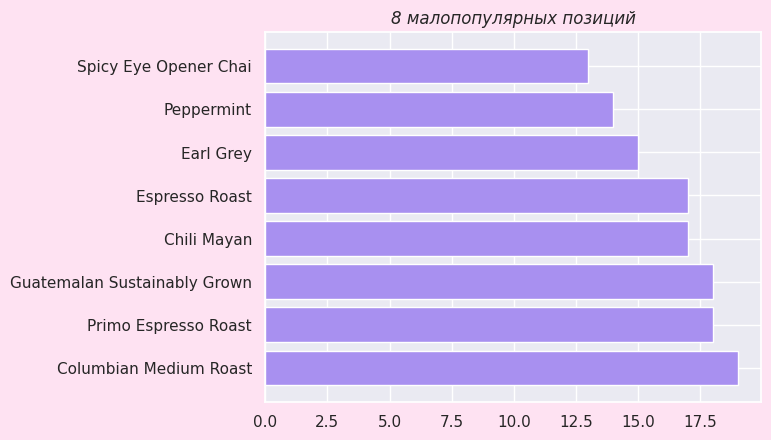

In [ ]:
sort_name = name.value_counts().sort_values(ascending=False)
plt.figure(facecolor='#FEE2F2')

plt.barh(sort_name[len(name.value_counts())-8:len(name.value_counts())].index,
         sort_name[len(name.value_counts())-8:len(name.value_counts())].values,
         color='#A890F0')
plt.title('8 малопопулярных позиций', style='italic')
plt.show()

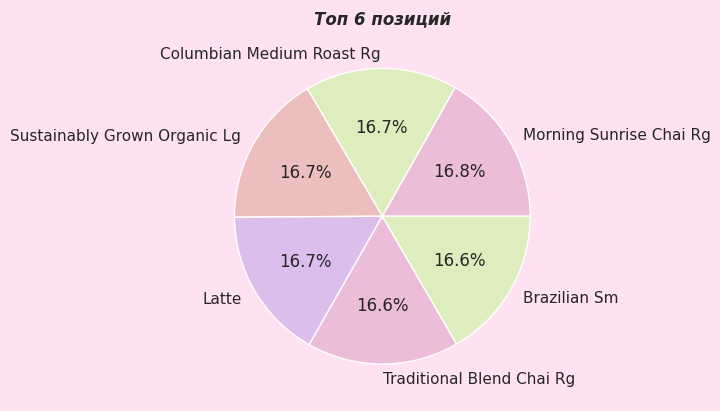

In [ ]:
plt.figure(facecolor='#FEE2F2')

plt.pie(name.value_counts()[:6].values,
        labels=name.value_counts()[:6].index,
        autopct='%1.1f%%',
        colors=['#ECBDD8','#DDEDBE','#EDBEBE','#DBBEEC'])

plt.title('Топ 6 позиций', style='italic', weight='heavy')
plt.show()

Выводы:
1. Количество уникальных значений 80. более 100 раз в датасет встречаются 56 позиций, более 500 -14.
2. Построена линейчатая диаграмма с 14ю самыми популярными продуктами. Они распределены примерно одинаково.
3. Построена круговая диаграмма с 6ю самыми популярными продуктами. Они так же распределяются равномерно. Находятся в одинаковом процентном соотношении.

### 'product_category'

In [ ]:
df_copy2[df_copy2.product_category.isin(['T e a ','C o f f e e '])].product_category

,product_category


In [ ]:
df_copy2.product_category

,product_category
0,Tea
1,Coffee
2,Tea
3,Coffee
4,Coffee
...,...
24847,Coffee
24848,Coffee
24849,Coffee
24850,Tea


In [ ]:
df_copy2.product_category.mode()

,product_category
0,Coffee


In [ ]:
df_copy2.product_category.describe()

,product_category
count,24852
unique,9
top,Coffee
freq,9948


In [ ]:
product_sort = df_copy2.product_category.value_counts().sort_values()

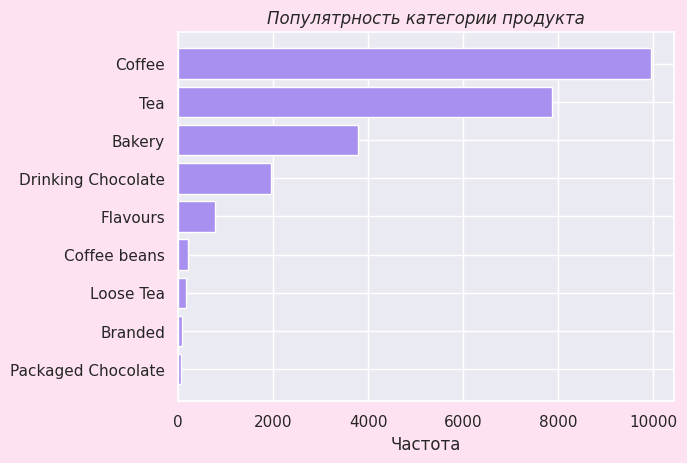

In [ ]:
plt.figure(facecolor='#FEE2F2')
plt.barh(product_sort.index, product_sort.values, color='#A890F0')
plt.title('Популятрность категории продукта', style='italic')
plt.xlabel('Частота')
plt.show()

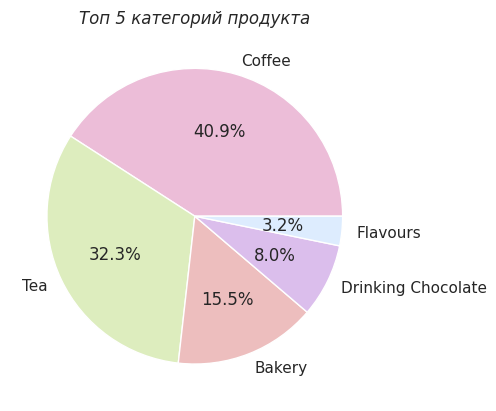

In [ ]:
product = df_copy2.product_category.value_counts()
plt.pie(product[:5].values,
        labels=product[:5].index,
        autopct='%1.1f%%',
        colors=['#ECBDD8','#DDEDBE','#EDBEBE','#DBBEEC', '#DDECFE'])
plt.title('Топ 5 категорий продукта',style='italic')
plt.show()

Вывод:
1. В колонке- категория продукта- 9 уникальных значений.
2. Самая популярная категория это coffee. Coffee - составляет 41% выборки, на втором месте Tea 32%, на третьем Bakery-15.5%.
3. На гистограмме изображены 9 категорий. Категории распределены не равномерно, есть существенно популярные позиции.На круговой диаграмме показаны топ 5.

# 4.3 Анализ взаимосвязи числовых признаков

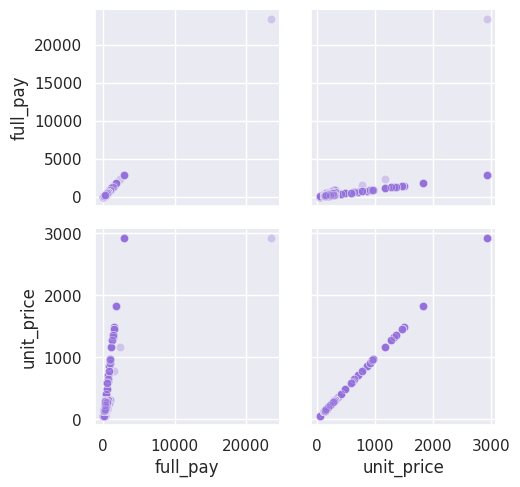

In [ ]:
g = sns.PairGrid(df_copy2[['full_pay','unit_price']])
g.map(sns.scatterplot, alpha=0.3, color='mediumpurple', label=['возраст','full чек'])

Рассмотрю значения выделяющиеся из основной массы

In [ ]:
df_copy2[(df_copy2.age==57)&(df_copy2.unit_price>=2925)] #выброс

,quantity,unit_price,product_name,product_category,store_city,gender,age,full_pay,city_id
17743,8,2925.0,Civet Cat,Coffee beans,Москва,женский,57,23400.0,8


In [ ]:
df_copy2[(df_copy2.unit_price>=2925)&(df_copy2.quantity==1)] #выбросы

,quantity,unit_price,product_name,product_category,store_city,gender,age,full_pay,city_id
10725,1,2925.0,Civet Cat,Coffee beans,Санкт-Петербург,мужской,52,2925.0,3
11628,1,2925.0,Civet Cat,Coffee beans,Санкт-Петербург,мужской,67,2925.0,3
11678,1,2925.0,Civet Cat,Coffee beans,Санкт-Петербург,женский,29,2925.0,3
12453,1,2925.0,Civet Cat,Coffee beans,Москва,мужской,53,2925.0,5
12595,1,2925.0,Civet Cat,Coffee beans,Москва,женский,38,2925.0,5
13129,1,2925.0,Civet Cat,Coffee beans,Санкт-Петербург,женский,62,2925.0,3
13581,1,2925.0,Civet Cat,Coffee beans,Москва,не указан,26,2925.0,5
13655,1,2925.0,Civet Cat,Coffee beans,Москва,женский,37,2925.0,5
14507,1,2925.0,Civet Cat,Coffee beans,Москва,женский,39,2925.0,5
14616,1,2925.0,Civet Cat,Coffee beans,Москва,мужской,43,2925.0,5


Рассчитаю коэффициент корреляции Пирсона, для числовых колонок.

In [ ]:
df_copy2[['age','quantity','unit_price','full_pay']].corr(method='pearson')

,age,quantity,unit_price,full_pay
age,1.000000,-0.011534,0.000104,-0.002055
quantity,-0.011534,1.000000,-0.121213,0.399274
unit_price,0.000104,-0.121213,1.000000,0.687897
full_pay,-0.002055,0.399274,0.687897,1.000000


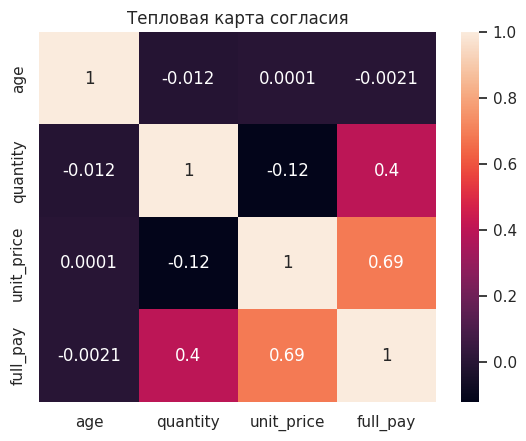

In [ ]:
sns.heatmap(df_copy2[['age','quantity','unit_price','full_pay']].corr(), annot=True)
plt.title('Тепловая карта согласия')
plt.show()

## 'quantity-'age'

Описательная статистика признака quantity-age

In [ ]:
df_copy2.groupby('quantity')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
quantity,,,,,,,,
1,14419.0,45.858173,15.126573,23.0,33.0,43.0,59.0,74.0
2,10054.0,45.657947,15.083760,23.0,32.0,43.0,59.0,74.0
3,373.0,43.991957,13.785314,23.0,33.0,42.0,56.0,74.0
4,5.0,35.600000,15.757538,24.0,25.0,29.0,38.0,62.0
8,1.0,57.000000,NaN,57.0,57.0,57.0,57.0,57.0


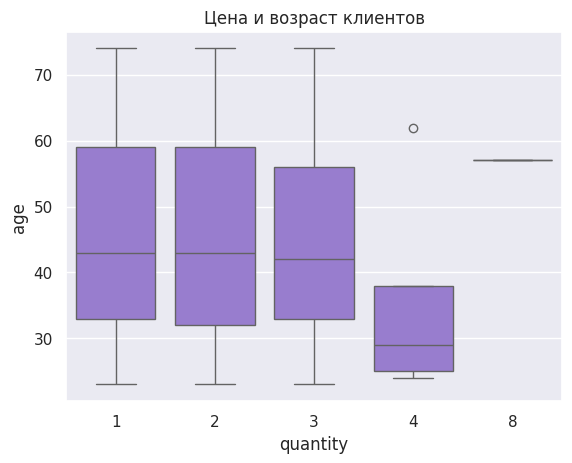

In [ ]:
sns.boxplot(x = df_copy2.quantity, y = df_copy2.age, color='mediumpurple')
plt.title('Цена и возраст клиентов')
plt.show()

In [ ]:
scipy.stats.spearmanr(df_copy2['quantity'], df_copy2['age'])

SignificanceResult(statistic=-0.010369437509514294, pvalue=0.10212171155856983)

Вывод:
1. Между числовыми признаками, остсутствуют линейная зависимость. Других взаимосвязей так же, не наблюдается.
2. Поскольку коэффициент pvalue равен 0.1, корреляция признаков 'age' и 'quantity' статистически не значима. Потому что близка к 0.
3. На общей диаграмме рассеивания, заметны выбросы, эти наблюдения рассмотрены.
4. По шкале Чеддока, теснота корреляционной связи слабая.

## 'quantity'-'unit_price'

Описательная статистика признака quantity-unit_price

In [ ]:
df_copy2.groupby('quantity')['unit_price'].describe()

,count,mean,std,min,25%,50%,75%,max
quantity,,,,,,,,
1,14419.0,231.922200,186.624594,52.0,162.5,201.5,243.75,2925.00
2,10054.0,192.561369,52.919852,52.0,162.5,195.0,227.50,1170.00
3,373.0,183.603217,50.469670,52.0,162.5,195.0,201.50,308.75
4,5.0,52.000000,0.000000,52.0,52.0,52.0,52.00,52.00
8,1.0,2925.000000,NaN,2925.0,2925.0,2925.0,2925.00,2925.00


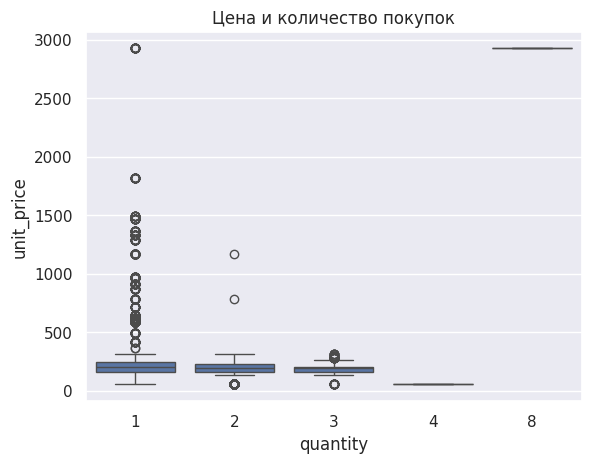

In [ ]:
sns.boxplot(x = df_copy2.quantity, y = df_copy2.unit_price)
plt.title('Цена и количество покупок')
plt.show()

In [ ]:
scipy.stats.spearmanr(df_copy2.quantity, df_copy2.unit_price)

SignificanceResult(statistic=-0.1611836141572501, pvalue=2.8266213062269363e-144)

pvalue - очень маленькое число менее 0.00001
Результат расчета коэффициента спирмана можно интерпретировать, что теснота корреляционной связи слабая, оценивая шкалой Чеддока.

Выводы:
1. По школе Чеддока, теснота корреляцияонной связи слабая.

# 4.4 Анализ взаимосвязи числовых и категориальных признаков

### 'age' - 'gender'

In [ ]:
df_copy2.groupby('gender')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
женский,10851.0,48.255921,14.885091,23.0,35.0,48.0,61.0,74.0
мужской,8222.0,49.754683,14.755767,23.0,37.0,50.0,63.0,74.0
не указан,5779.0,35.336563,10.519365,23.0,28.0,33.0,39.0,74.0


<ipython-input-315-3d6884005eeb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_copy2['age'], y=df_copy2['gender'], palette=['plum','gray','dodgerblue'])


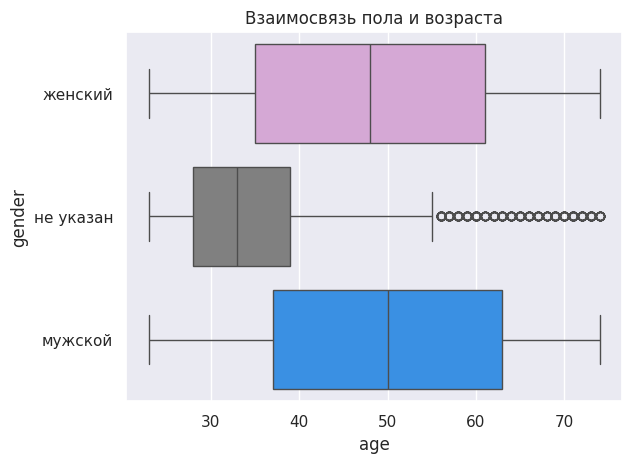

In [ ]:
sns.boxplot(x=df_copy2['age'], y=df_copy2['gender'], palette=['plum','gray','dodgerblue'])
plt.title('Взаимосвязь пола и возраста')
plt.show()

Text(0.5, 1.0, 'Взаимосвязь пола и медианного возраста')

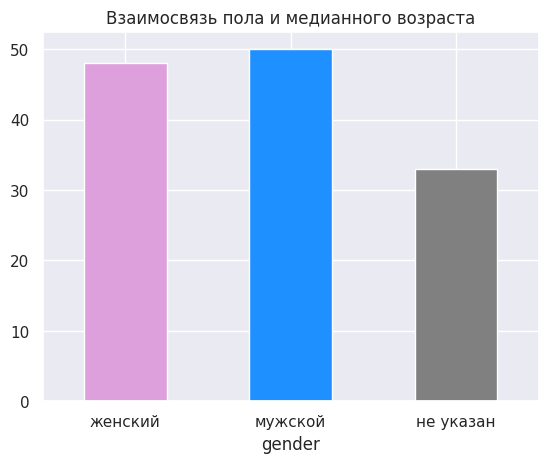

In [ ]:
df_copy2.groupby('gender')['age'].median().plot(kind='bar', color=['plum','dodgerblue','gray'])
plt.xticks(rotation=360)
plt.title('Взаимосвязь пола и медианного возраста')

In [ ]:
#Проверяю признак на нормальность распределения, фильтруя по полу мужского и женского
stats.shapiro(df_copy2[df_copy2['gender']=='женский']['age'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10851.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.9526847297142392, pvalue=3.869979428613761e-50)

In [ ]:
stats.shapiro(df_copy2[df_copy2['gender']=='мужской']['age'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8222.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.949900466672678, pvalue=2.4470806328611816e-46)

pvalue по всем выборкам меньше 0.05. Гипотеза H1-выборка не принадлежит к нормальному распределению. Необходимо расчитать непарамметрийческий критерий сравнения группа Манна-Уитни

In [ ]:
scipy.stats.mannwhitneyu(df_copy2[df_copy2['gender']=='женский']['age'],df_copy2[df_copy2['gender']=='не указан']['age'])

MannwhitneyuResult(statistic=47093158.5, pvalue=0.0)

<ipython-input-320-dff7db3e649b>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_copy2[df_copy2['gender']=='женский']['age'], color='plum', alpha=0.8, shade=True, label='woman')
<ipython-input-320-dff7db3e649b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_copy2[df_copy2['gender']=='мужской']['age'], color='dodgerblue', alpha=0.3, shade=True, label='man')


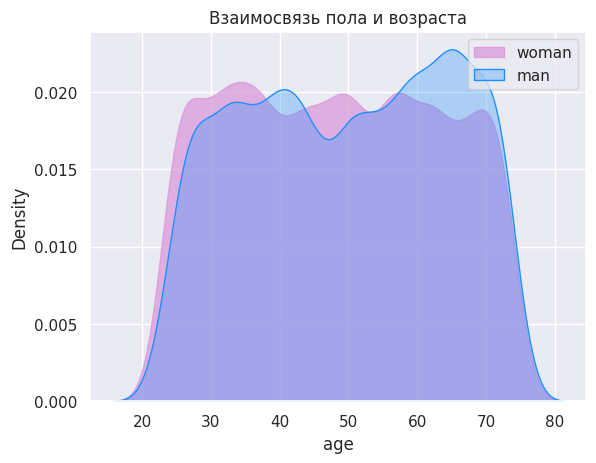

In [ ]:
sns.kdeplot(df_copy2[df_copy2['gender']=='женский']['age'], color='plum', alpha=0.8, shade=True, label='woman')
sns.kdeplot(df_copy2[df_copy2['gender']=='мужской']['age'], color='dodgerblue', alpha=0.3, shade=True, label='man')
plt.legend()
plt.title('Взаимосвязь пола и возраста')
plt.show()

Выводы:
1. Количество женщин больше, чем мужчин (10851 -8222).
2. Распределения мужского и женского пола не является нормальным. Это видно из расчета проведенных тестов.
3. Медианное значение возраста для женщин 48, для мужчин 50 лет.
4. Возраст клиентов кофейни, отличается в зависимости от половой принадлежности.

### 'store_id'- 'age' -'gender'

Создаю дополнительную колонку с наименованием города и id города. Чтобы проанализировать каждый конкретный магазин с возрастом и полом.

In [ ]:
def city_id(data):
  return json.loads(data)['sales_outlet_id'], json.loads(data)['store_city']
df_copy2['store_id'] = df.store_info.apply(city_id)

In [ ]:
df_copy2['store_id'].value_counts()

,count
store_id,
"(3, Санкт-Петербург)",8593
"(5, Москва)",8545
"(8, Moscow)",7714


In [ ]:
df_copy2['store_id'].describe()

,store_id
count,24852
unique,3
top,"(3, Санкт-Петербург)"
freq,8593


In [ ]:
df_copy2.groupby(['gender', 'store_id'])['age'].describe()

count       mean        std   min   25%  \
gender    store_id                                                         
женский   (3, Санкт-Петербург)  4296.0  48.373836  15.027453  23.0  35.0   
          (5, Москва)           3248.0  48.166256  14.908036  23.0  35.0   
          (8, Moscow)           3307.0  48.190807  14.678760  24.0  35.0   
мужской   (3, Санкт-Петербург)  3226.0  49.446063  14.782570  23.0  37.0   
          (5, Москва)           2107.0  49.457997  14.237722  23.0  37.0   
          (8, Moscow)           2889.0  50.315680  15.082002  23.0  36.0   
не указан (3, Санкт-Петербург)  1071.0  49.183007  14.831204  23.0  37.0   
          (5, Москва)           3190.0  33.577429   6.051788  23.0  28.0   
          (8, Moscow)           1518.0  29.264163   3.251395  23.0  27.0   

                                 50%   75%   max  
gender    store_id                                
женский   (3, Санкт-Петербург)  48.0  61.0  74.0  
          (5, Москва)           48.0  61.0  74.0  
          (8, Moscow)           49.0  61.0  74.0  
мужской   (3, Санкт-Петербург)  50.0  63.0  74.0  
          (5, Москва)           50.0  61.0  74.0  
          (8, Moscow)           51.0  64.0  74.0  
не указан (3, Санкт-Петербург)  50.0  62.0  74.0  
          (5, Москва)           33.0  39.0  44.0  
          (8, Moscow)           29.0  32.0  36.0

In [ ]:
df_copy2.loc[df_copy2.store_id == (8,'Moscow'), 'store_id'] = 'Москва 8'
df_copy2.loc[df_copy2.store_id == (5,'Москва'), 'store_id'] = 'Москва 5'
df_copy2.loc[df_copy2.store_id == (3,'Санкт-Петербург'), 'store_id'] = 'Санкт-Петербург 3'

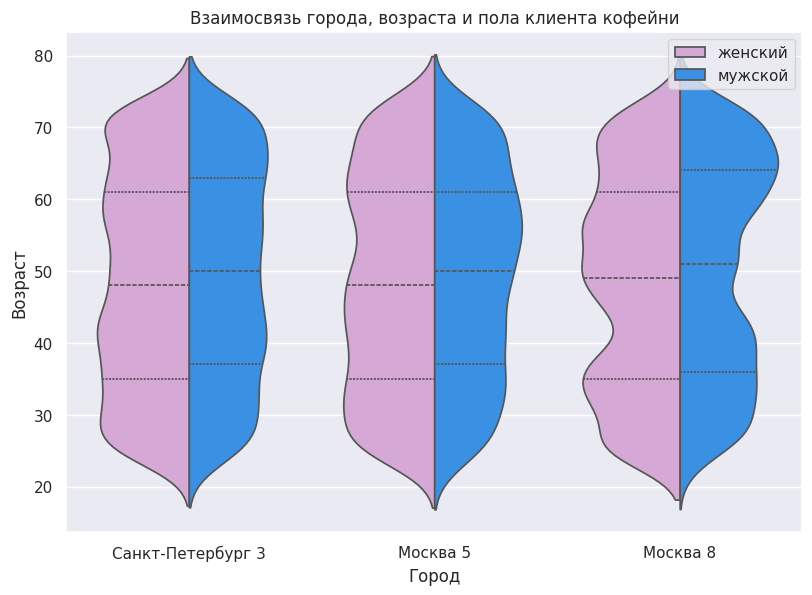

In [ ]:
plt.figure(figsize=[9.5, 6.5])
sns.violinplot(data=df_copy2,
               x='store_id',
               y='age',
               hue=df_copy2[df_copy2.gender !='не указан'].gender,
               split=True,
               inner='quart',
               palette=['plum','dodgerblue'])
plt.title('Взаимосвязь города, возраста и пола клиента кофейни')
plt.legend(loc='upper right')
plt.xlabel('Город')
plt.ylabel('Возраст')
plt.show()

In [ ]:
stats.shapiro(df_copy2[df_copy2['store_id']=='Санкт-Петербург 3']['age'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8593.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.952442586823248, pvalue=3.200938148575321e-46)

In [ ]:
stats.shapiro(df_copy2[df_copy2['store_id']=='Москва 5']['age'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8545.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.9285567971368969, pvalue=4.148134610618055e-53)

In [ ]:
scipy.stats.mannwhitneyu(df_copy2[df_copy2['store_id']=='Санкт-Петербург 3']['age'],
                         df_copy2[df_copy2['store_id']=='Москва 5']['age'])

MannwhitneyuResult(statistic=45017703.0, pvalue=4.417440477920003e-145)

Выводы:
1. pvalue < 0.05, отвергаю гипотезу о нормальном распределении.Выборки не принадлежат нормальной генерации совокупностей.
2. Различия статистически значимы, о чем свидетельствует проведенный тест.
3. Распределения пола в зависимости от возраста и города, на скрипичной диаграмме в городе Санкт-Петербург 3 и Москва 5 похожи. Москва 8- отличается.
4. Медианное значение возраста у женщин 48 лет, мужчины 50- небольшое различие.

### 'full_pay' - 'store_city'+'city_id'

In [ ]:
df_copy2.store_id.value_counts()

,count
store_id,
Санкт-Петербург 3,8593
Москва 5,8545
Москва 8,7714


In [ ]:
df_copy2.groupby('store_id')['full_pay'].describe()

,count,mean,std,min,25%,50%,75%,max
store_id,,,,,,,,
Москва 5,8545.0,304.775606,189.234271,52.0,195.0,243.75,390.0,2925.0
Москва 8,7714.0,301.602612,318.126947,52.0,195.0,243.75,390.0,23400.0
Санкт-Петербург 3,8593.0,292.695461,164.631092,52.0,195.0,243.75,390.0,2925.0


<ipython-input-332-651bc2e8f692>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_copy2['store_id'],


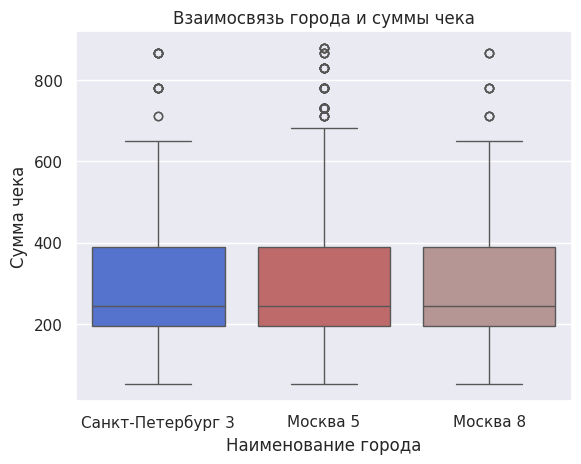

In [ ]:
sns.boxplot(x=df_copy2['store_id'],
            y=df_copy2[df_copy2['full_pay']<full.quantile(0.99)]['full_pay'],
            palette = ['royalblue', 'indianred', 'rosybrown'])
plt.title('Взаимосвязь города и суммы чека')
plt.xlabel('Наименование города')
plt.ylabel('Сумма чека')
plt.show()

<ipython-input-333-39470c9f217e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_copy2['store_id'],


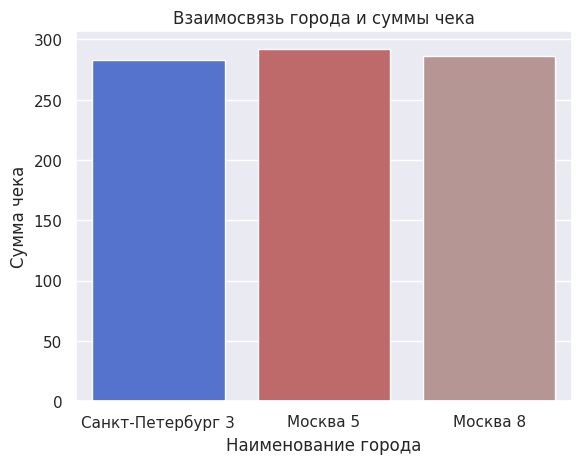

In [ ]:
sns.barplot(x=df_copy2['store_id'],
            y=df_copy2[df_copy2['full_pay']<full.quantile(0.99)]['full_pay'],
            palette=['royalblue', 'indianred', 'rosybrown'], errorbar=None)
plt.title('Взаимосвязь города и суммы чека')
plt.xlabel('Наименование города')
plt.ylabel('Сумма чека')
plt.show()

In [ ]:
#Проверяю признак на нормальность распределения, фильтруя по городу
stats.shapiro(df_copy2[df_copy2['store_id']=='Санкт-Петербург 3']['full_pay'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8593.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.7058500510741603, pvalue=1.749737225214251e-81)

In [ ]:
stats.shapiro(df_copy2[df_copy2['store_id']=='Москва 8']['full_pay'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7714.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.25321200383615206, pvalue=1.6038598541333195e-100)

In [ ]:
stats.shapiro(df_copy2[df_copy2['store_id']=='Москва 5']['full_pay'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8545.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.6994421457229175, pvalue=7.904878792178188e-82)

pvalue по всем выборкам меньше 0.05. Гипотеза H1-выборка не принадлежит к нормальному распределению. Необходимо расчитать непарамметрийческий критерий сравнения группа Манна-Уитни

In [ ]:
scipy.stats.mannwhitneyu(df_copy2[df_copy2['store_id']=='Москва 5']['full_pay'],
                         df_copy2[df_copy2['store_id']=='Москва 8']['full_pay'])

MannwhitneyuResult(statistic=33413034.5, pvalue=0.12688665686595704)

In [ ]:
scipy.stats.mannwhitneyu(df_copy2[df_copy2['store_id']=='Санкт-Петербург 3']['full_pay'],
                         df_copy2[df_copy2['store_id']=='Москва 8']['full_pay'])

MannwhitneyuResult(statistic=32610018.0, pvalue=0.07477347969709791)

Выводы:
1. Средние, а также 75 процентили у всех 3х магазинов одинаковы 245 и 390 соответственно. В кофейне Москва 8, имеется экстемальное значение (23400) существенно отличающееся от всей выборки и других кофейнях, с максимальным-2925.
2. Основная масса выборки на боксплот изображена очень схоже, отличие лишь в количествах выбросов. На столбчатой диаграмме видно также, что распределение чека очень похожи в зависимости от города и конкретной кофейни.
3.Выборка проверена на нормальность распределения. По Шапиро - H1- выборка не принадлежит нормальной генерации совокупностей. При расчете критерия Манни-Уитни, значение pvalue 0.05, принимается гипотеза о нормальном распределении. Выборка принадлежит нормальному распределению.
4. Взаимосвязь города, где находится кофейня, и чека не является статистически значимой.

<ipython-input-339-80afd96213b7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='full_pay',


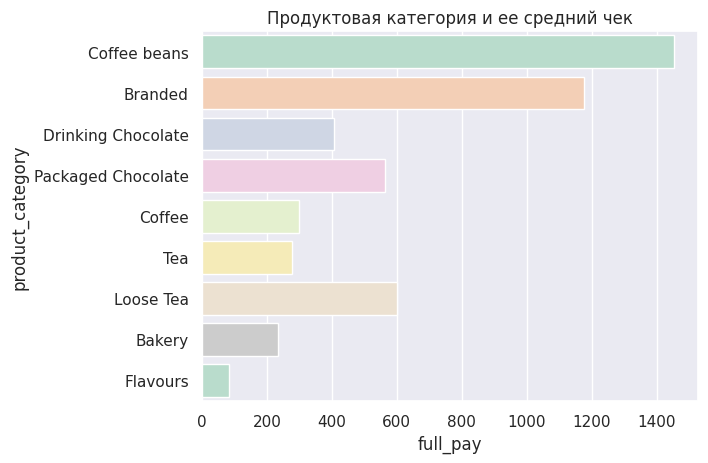

In [ ]:
sns.barplot(x='full_pay',
            y='product_category',
            data=df_copy2.sort_values(by='full_pay',ascending=False),
            errorbar=None,
            palette=plt.cm.Pastel2.colors,
            estimator='mean'
            )
plt.title('Продуктовая категория и ее средний чек')
plt.show()

<ipython-input-340-284ee0cb6d65>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_copy2[df_copy2['product_category']==i]['product_name'],


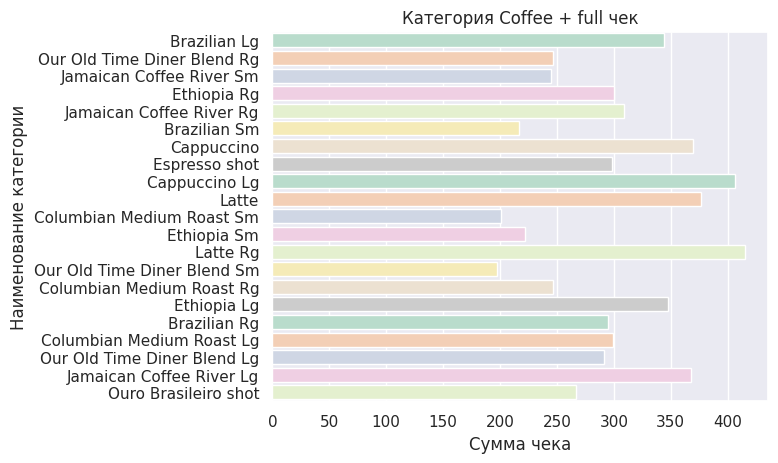

<ipython-input-340-284ee0cb6d65>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_copy2[df_copy2['product_category']==i]['product_name'],


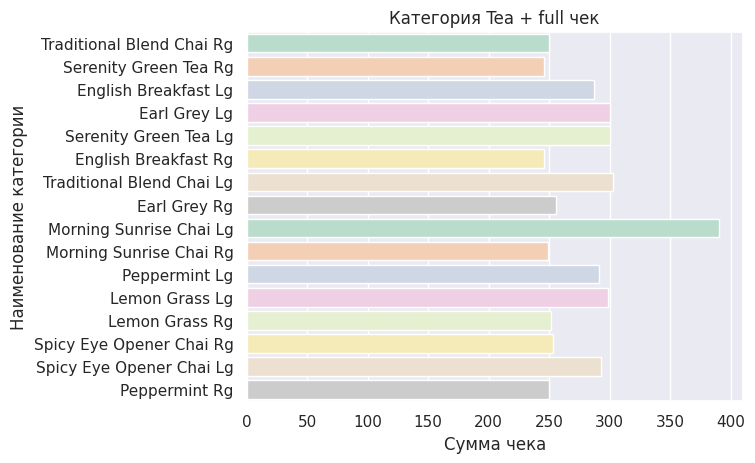

<ipython-input-340-284ee0cb6d65>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_copy2[df_copy2['product_category']==i]['product_name'],


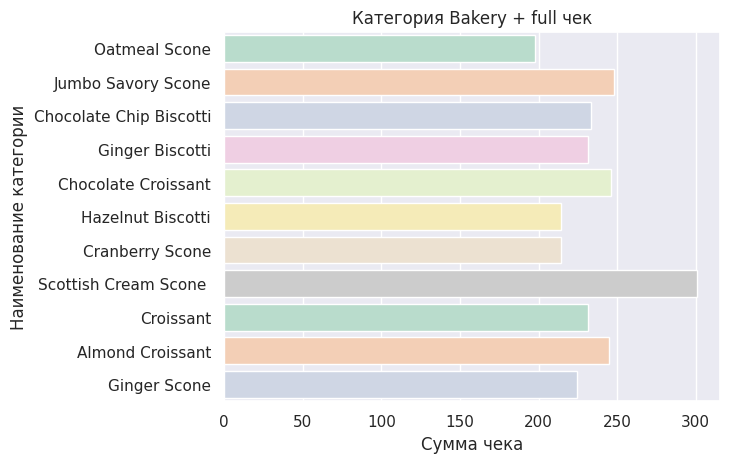

<ipython-input-340-284ee0cb6d65>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_copy2[df_copy2['product_category']==i]['product_name'],


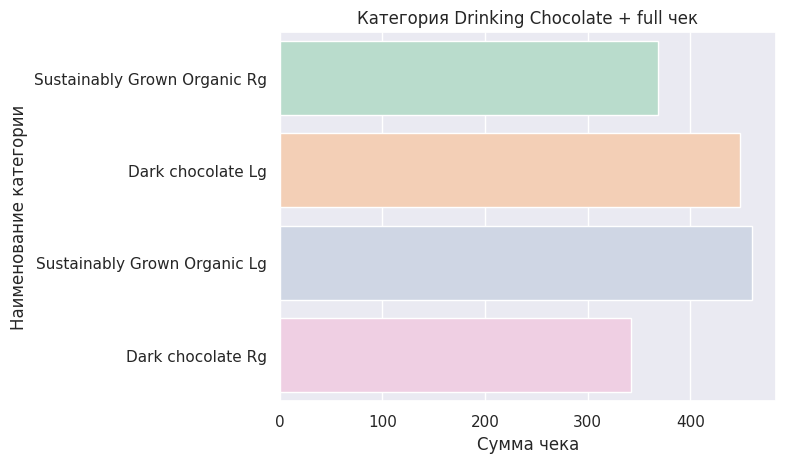

<ipython-input-340-284ee0cb6d65>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_copy2[df_copy2['product_category']==i]['product_name'],


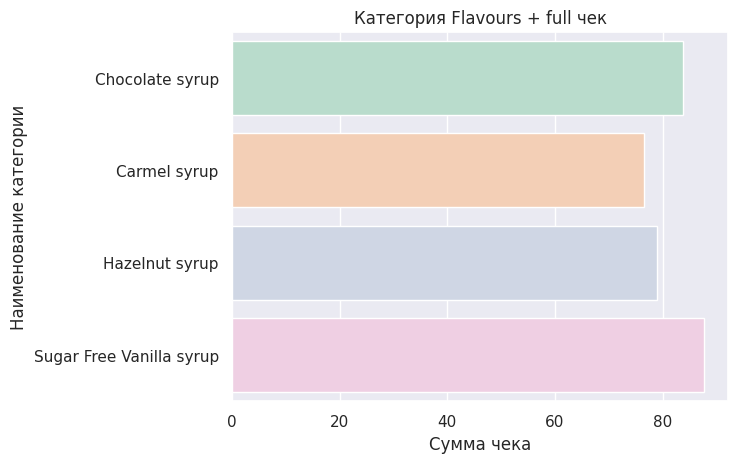

<ipython-input-340-284ee0cb6d65>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_copy2[df_copy2['product_category']==i]['product_name'],


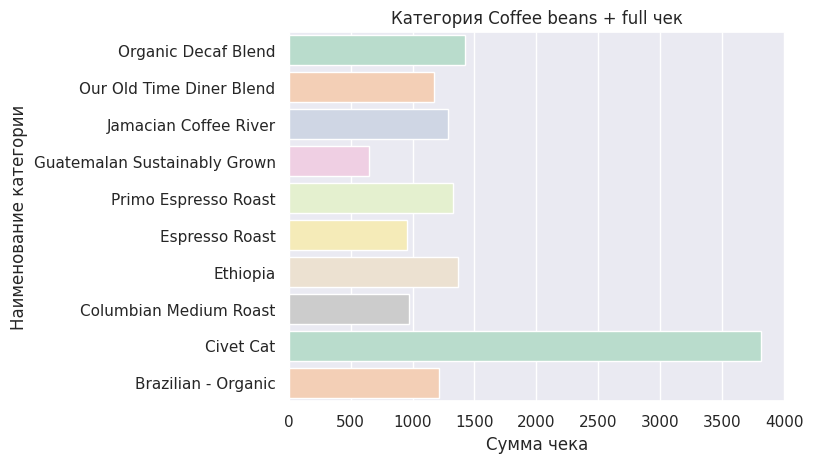

<ipython-input-340-284ee0cb6d65>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_copy2[df_copy2['product_category']==i]['product_name'],


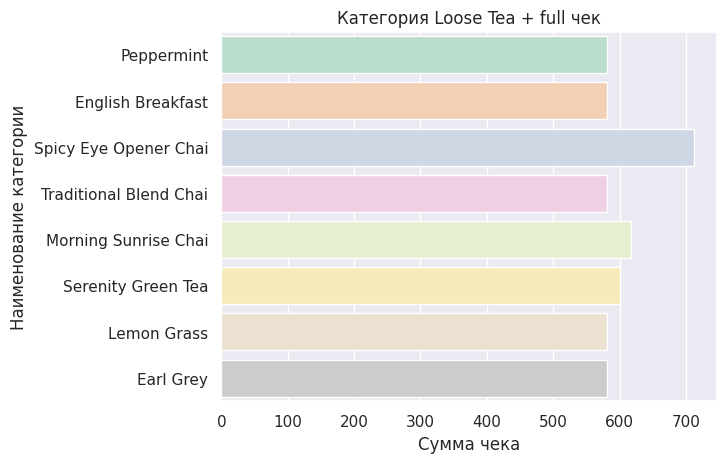

<ipython-input-340-284ee0cb6d65>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_copy2[df_copy2['product_category']==i]['product_name'],


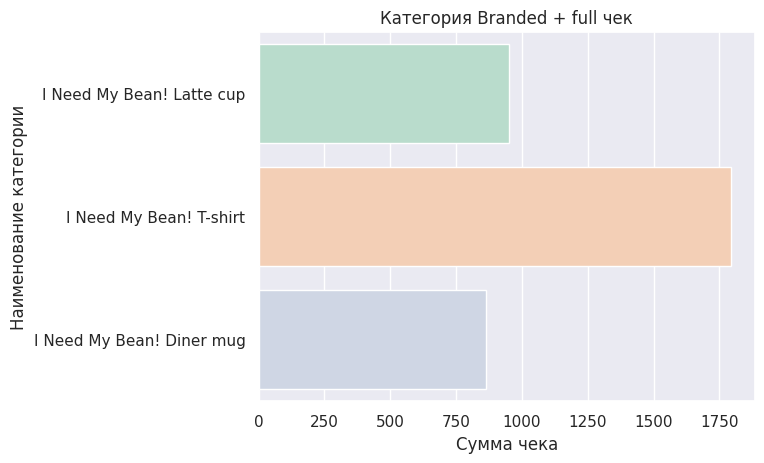

<ipython-input-340-284ee0cb6d65>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_copy2[df_copy2['product_category']==i]['product_name'],


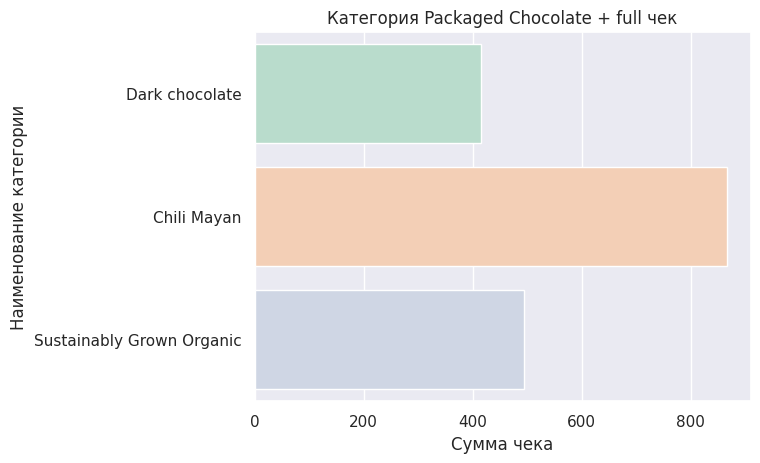

In [ ]:
for i in df_copy2.product_category.value_counts().index:
  sns.barplot(y=df_copy2[df_copy2['product_category']==i]['product_name'],
              x=df_copy2[df_copy2.product_category==i]['full_pay'],
              palette=plt.cm.Pastel2.colors,
              errorbar=None,
              estimator='mean')
  plt.title(f'Категория {i} + full чек')
  plt.ylabel('Наименование категории')
  plt.xlabel('Сумма чека')
  plt.show()

# 4.5 Анализ взаимосвязи категориальных признаков

## 'gender' - 'store_id'

In [ ]:
df_copy2.gender.value_counts().index
df_copy2.store_id.value_counts().index
df_copy2[df_copy2['store_id']=='Москва 8']

,quantity,unit_price,product_name,product_category,store_city,gender,age,full_pay,city_id,store_id
1102,1,162.50,Lemon Grass Rg,Tea,Москва,женский,50,162.50,8,Москва 8
1103,1,201.50,Spicy Eye Opener Chai Lg,Tea,Москва,не указан,25,201.50,8,Москва 8
1104,1,211.25,Hazelnut Biscotti,Bakery,Москва,не указан,25,211.25,8,Москва 8
1105,1,162.50,Morning Sunrise Chai Rg,Tea,Москва,женский,33,162.50,8,Москва 8
1106,2,162.50,Morning Sunrise Chai Rg,Tea,Москва,женский,70,325.00,8,Москва 8
...,...,...,...,...,...,...,...,...,...,...
24847,1,276.25,Cappuccino Lg,Coffee,Москва,мужской,62,276.25,8,Москва 8
24848,1,136.50,Ouro Brasileiro shot,Coffee,Москва,мужской,70,136.50,8,Москва 8
24849,2,143.00,Brazilian Sm,Coffee,Москва,мужской,71,286.00,8,Москва 8
24850,2,162.50,Peppermint Rg,Tea,Москва,женский,30,325.00,8,Москва 8


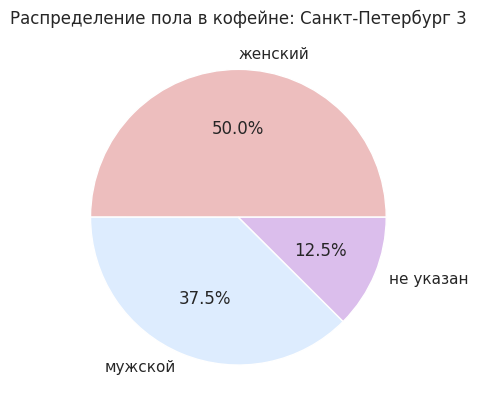

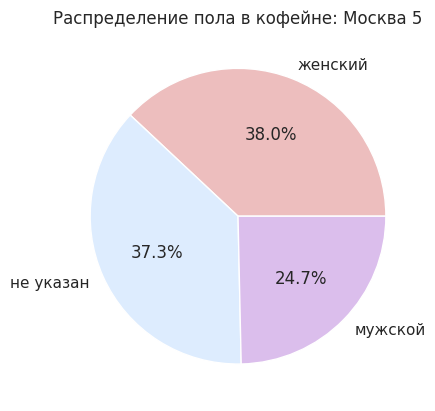

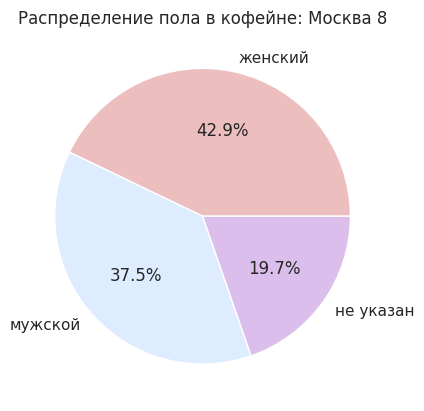

In [ ]:
for i in df_copy2.store_id.value_counts().index:
  a = df_copy2[df_copy2.store_id==i]['gender'].value_counts()
  plt.pie(a.values, labels=a.index, autopct='%1.1f%%', colors = ['#EDBEBE','#DDECFE','#DBBEEC'])
  plt.title(f'Распределение пола в кофейне: {i}')
  plt.show()

In [ ]:
WF = pd.crosstab(df_copy2.gender, df_copy2.store_id)
WF

store_id,Москва 5,Москва 8,Санкт-Петербург 3
gender,,,
женский,3248,3307,4296
мужской,2107,2889,3226
не указан,3190,1518,1071


Выводы:
1. Женщин посещающих кофейню больше чем мужчин, в каждой конкретной кофейне.
2. В Санкт-Петербурге самая популярная кофейня.

## 'gender'-'product_category'

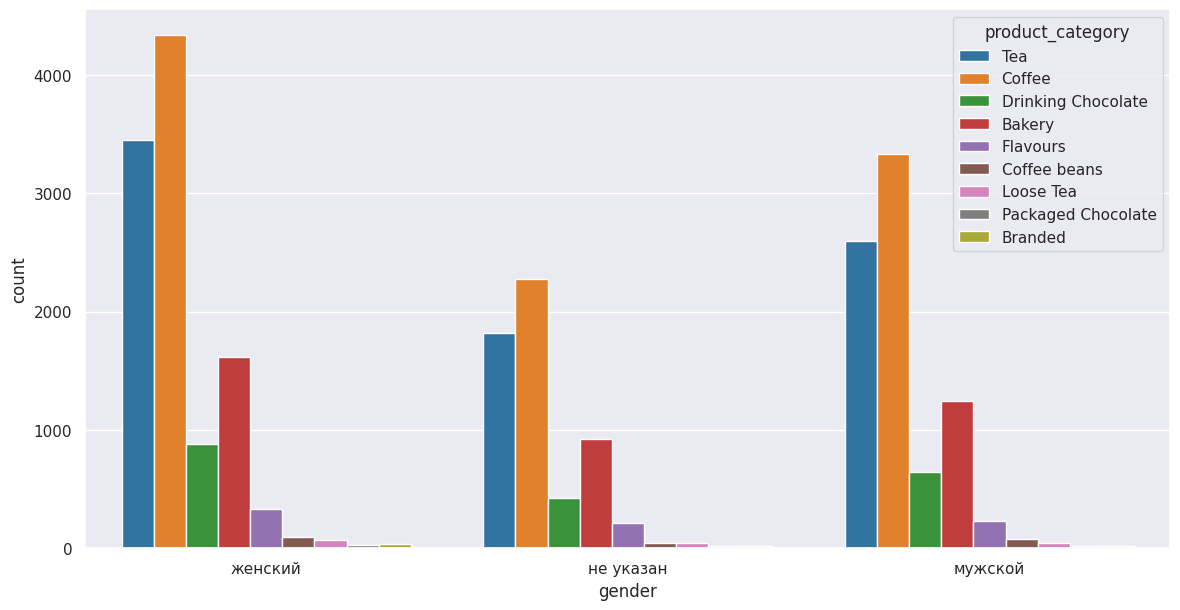

In [ ]:
fig, az = plt.subplots()
fig.set_size_inches(14,7)
sns.countplot(x='gender', hue= 'product_category', data=df_copy2, palette=plt.cm.tab10.colors)
plt.show()

In [ ]:
WF = pd.crosstab(df_copy.gender, df_copy2.product_category)
WF

product_category,Bakery,Branded,Coffee,Coffee beans,Drinking Chocolate,Flavours,Loose Tea,Packaged Chocolate,Tea
gender,,,,,,,,,
женский,1616,38,4338,97,884,334,66,28,3450
мужской,1244,23,3335,79,645,233,48,22,2593
не указан,920,21,2275,41,426,215,41,17,1823


In [ ]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, f, prob))

test Statistics: 20.29380986684564
degrees of freedom: 16
p-value: 0.20727812720570962



Выводы:
1. У женщин самый предпочитаемый продукт является коффе, затем идет чай и на третьем месте выпечка, та же картина наблюдается и у мужчин, и у тех, кто пол не указал.
2. Можно предположить, что взаимосвязи пола и предпочитаемой продукции нет.
3. Тест на нормальность распределения подтверждает гипотезе H0- выборка относиться к нормальному распределению.

## 'store_id' - 'product_name'

In [ ]:
list_top10_name_product =df_copy2.product_name.value_counts()[:10].index

In [ ]:
df_top10_product_name = df_copy2[df_copy2.product_name.isin(list_top10_name_product)]

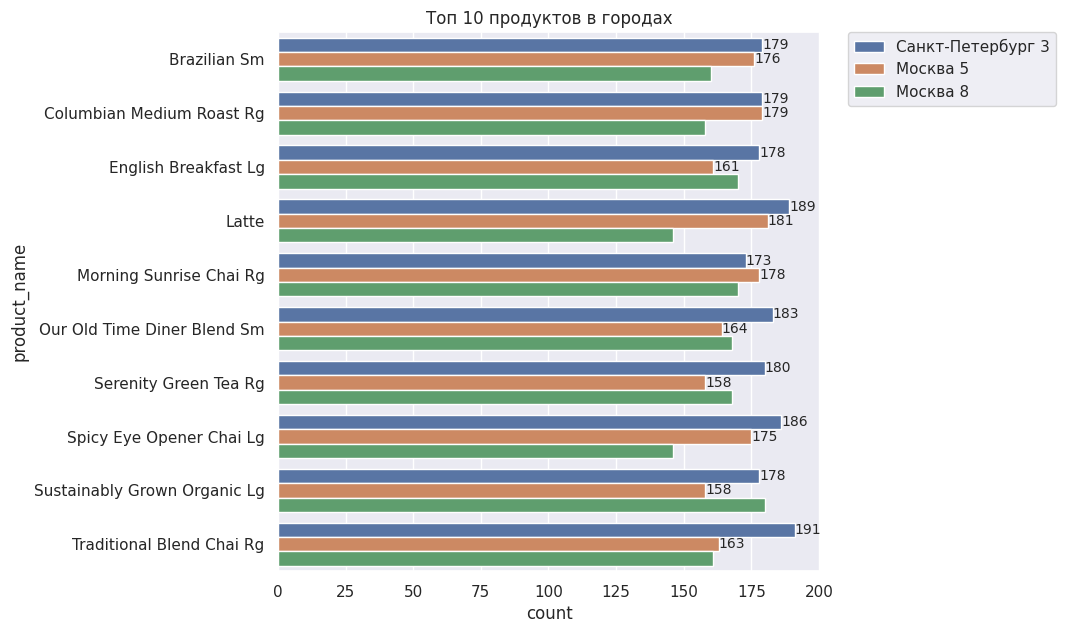

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(7,7)
ax = sns.countplot(y='product_name',
                   hue='store_id',
                   data=df_top10_product_name,
                   order=df_top10_product_name.groupby('product_name')['store_id'].describe().index)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad= 0)
plt.title('Топ 10 продуктов в городах')
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.show()

In [ ]:
WF = pd.crosstab(df_copy2.store_id, df_copy2.product_name)
WF

product_name,Almond Croissant,Brazilian - Organic,Brazilian Lg,Brazilian Rg,Brazilian Sm,Cappuccino,Cappuccino Lg,Carmel syrup,Chili Mayan,Chocolate Chip Biscotti,...,Spicy Eye Opener Chai,Spicy Eye Opener Chai Lg,Spicy Eye Opener Chai Rg,Sugar Free Vanilla syrup,Sustainably Grown Organic,Sustainably Grown Organic Lg,Sustainably Grown Organic Rg,Traditional Blend Chai,Traditional Blend Chai Lg,Traditional Blend Chai Rg
store_id,,,,,,,,,,,,,,,,,,,,,
Москва 5,111,11,163,165,176,156,175,91,5,126,...,7,175,161,109,10,158,165,6,145,163
Москва 8,97,10,158,159,160,159,130,63,4,75,...,4,146,153,72,8,180,142,9,149,161
Санкт-Петербург 3,109,6,150,173,179,161,163,43,8,100,...,2,186,164,40,11,178,186,7,176,191


In [ ]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, f, prob))

test Statistics: 531.4655033740443
degrees of freedom: 158
p-value: 6.257448214651329e-42



Выводы:
1. На диаграмме представлены топ 10 наименований продуктов в городах, в каждом конкретном магазине.
2. В Санкт-Петербурге на 1 месте: "Tradional Blend Chai Rg"
В Москве 5: "Latte" и в Москве 8: 'Sustainably Grown Organic Lg'
3. Ярко выраженных тенденций популярности напитка от города- на графике наблюдается.
4.Однако результ тест показал, что распределение является статистически значимым. Гипотеза H1

## 'product_category' - 'product_name'

In [ ]:
df_copy2.product_category.unique()

array(['Tea', 'Coffee', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Coffee beans', 'Loose Tea', 'Packaged Chocolate', 'Branded'],
      dtype=object)

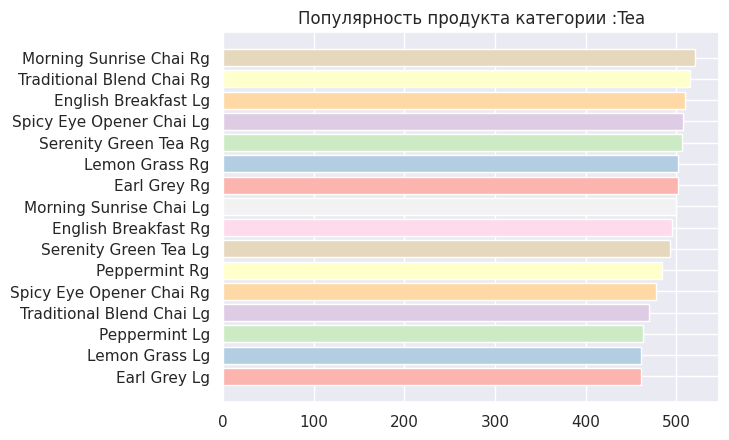

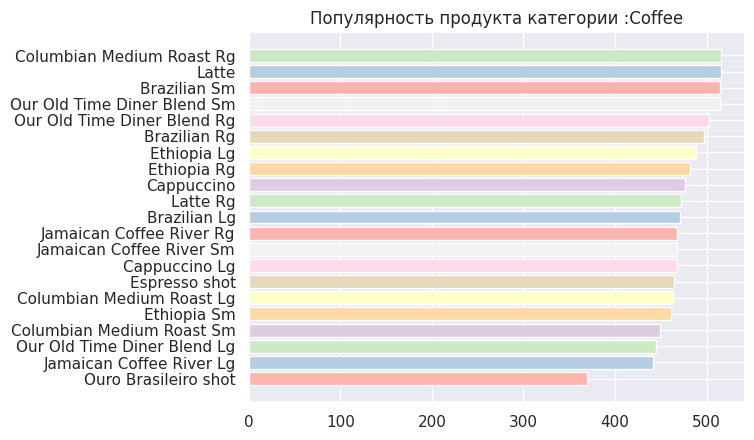

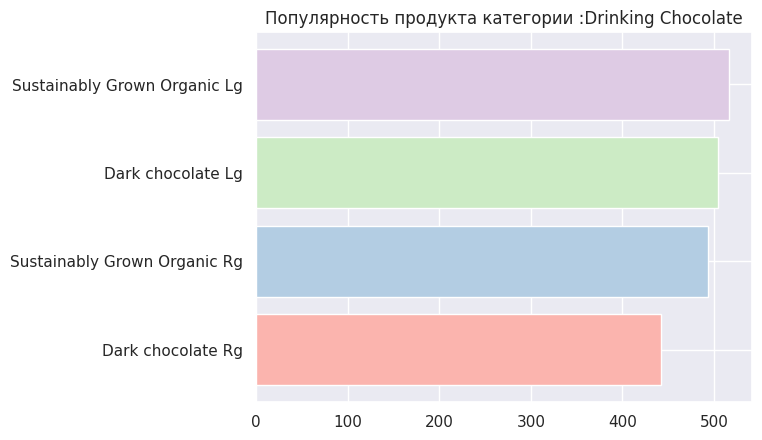

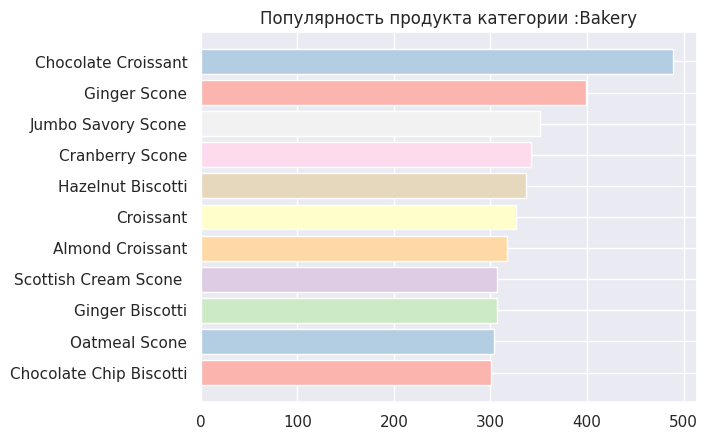

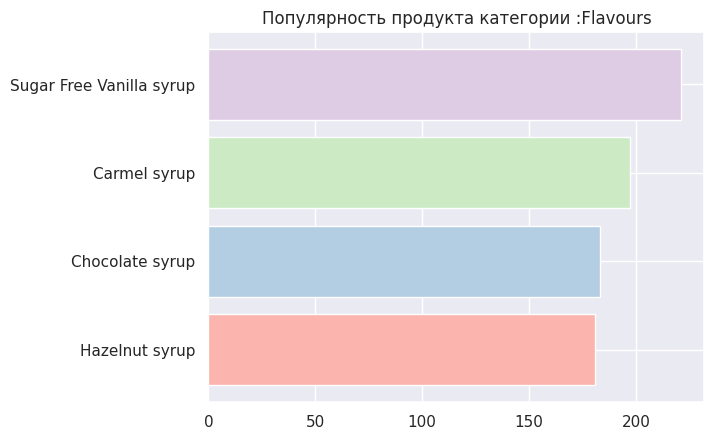

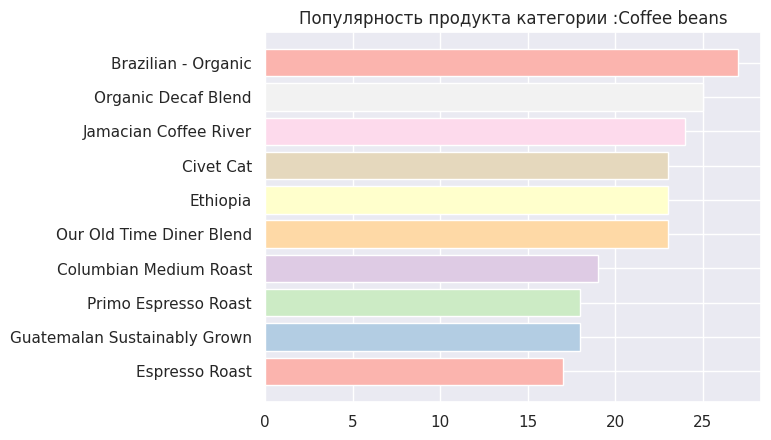

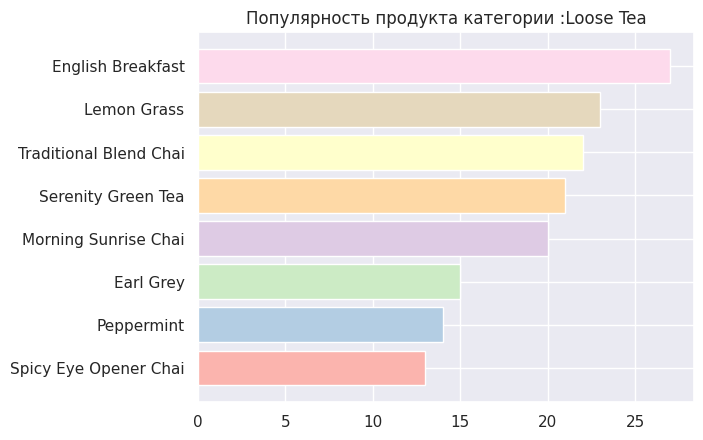

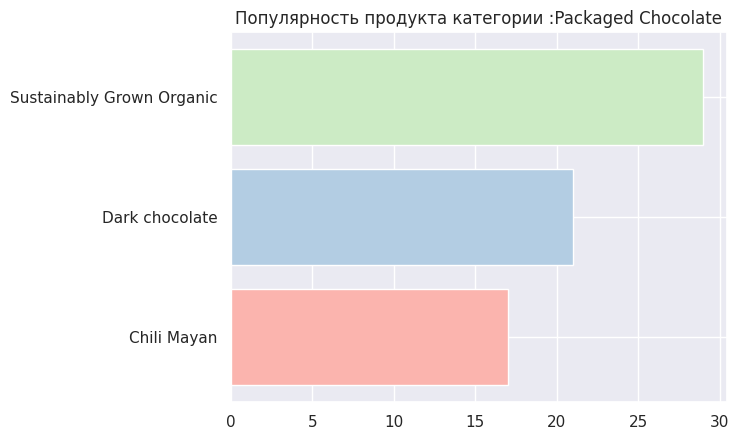

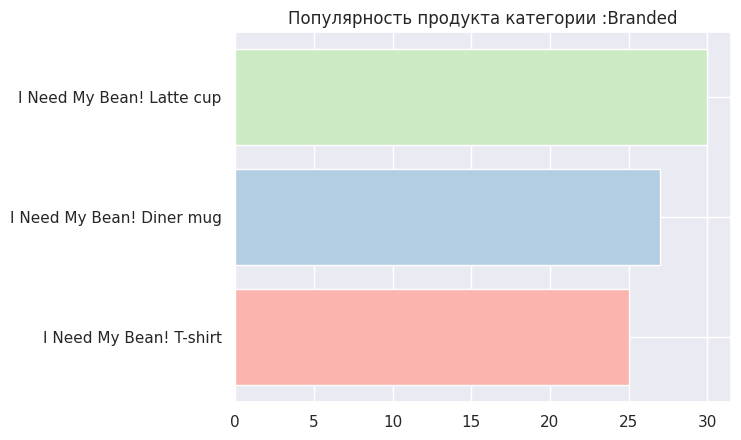

In [ ]:
for a in df_copy2.product_category.unique():
  plt.barh(df_copy2[df_copy.product_category==a]['product_name'].value_counts().sort_values(ascending=True).index,
         df_copy2[df_copy.product_category==a]['product_name'].value_counts().sort_values(ascending=True).values, color=plt.cm.Pastel1.colors)
  plt.title(f'Популярность продукта категории :{a}')
  plt.show()

In [ ]:
WF = pd.crosstab(df_copy2.product_category, df_copy2.product_name)
WF

product_name,Almond Croissant,Brazilian - Organic,Brazilian Lg,Brazilian Rg,Brazilian Sm,Cappuccino,Cappuccino Lg,Carmel syrup,Chili Mayan,Chocolate Chip Biscotti,...,Spicy Eye Opener Chai,Spicy Eye Opener Chai Lg,Spicy Eye Opener Chai Rg,Sugar Free Vanilla syrup,Sustainably Grown Organic,Sustainably Grown Organic Lg,Sustainably Grown Organic Rg,Traditional Blend Chai,Traditional Blend Chai Lg,Traditional Blend Chai Rg
product_category,,,,,,,,,,,,,,,,,,,,,
Bakery,317,0,0,0,0,0,0,0,0,301,...,0,0,0,0,0,0,0,0,0,0
Branded,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Coffee,0,0,471,497,515,476,468,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Coffee beans,0,27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Drinking Chocolate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,516,493,0,0,0
Flavours,0,0,0,0,0,0,0,197,0,0,...,0,0,0,221,0,0,0,0,0,0
Loose Tea,0,0,0,0,0,0,0,0,0,0,...,13,0,0,0,0,0,0,22,0,0
Packaged Chocolate,0,0,0,0,0,0,0,0,17,0,...,0,0,0,0,29,0,0,0,0,0
Tea,0,0,0,0,0,0,0,0,0,0,...,0,507,478,0,0,0,0,0,470,515


In [ ]:
chi2, prod, f, expceted = scipy.stats.chi2_contingency(WF)
output = 'Тест Статистика: {}\ndegress of freedom: {}\np-value: {}\n'
print(output.format(chi2, f, prob))

Тест Статистика: 198816.0
degress of freedom: 632
p-value: 6.257448214651329e-42



Выводы:
1. На линейчатых диаграммах представлены категории продуктов и их наименования. В категории Coffee на первом по пулярности Columbian Medium Roast Rg. В категории Tea- Morning Sunrise Chai Rg. В категории Bakery популярнее всего Chocolatte Croissant.
2. Ваимосвязь продукта в зависимости от категории, является статистически значимой. Подтверждается проведенным тестом.

# 5. Evaluation / Общие выводы и рекомендации

1. Был предоставлен датасет с выгрузкой о транзакциях и клиентах, из CRM системы. Файл в формате csv, содержащий 24909 наблюдейний(строк) 6 признаков(столбцов)
2. Предобработка данных включала в себя: исключение нерелевантных признаков и объектов, дубликатов, распаковку и форматирование данных, расчет дополнительных признаков.
3. По итогу предобработки сохранено два датасета для последующего анализа:
файл в формате csv b xlsx, содержащие 24852 строк(наблюдений) и  7 столбцов(признаков)
4. При анализе, потребовалось создать дополнительно признак full_pay (общий чек клиента)  и store_id -город содержащий id кофейни, для анализа каждой конткретной кофейни  по городам.

 Портереты клиентов сети кофеен:
- Возраст и половая принадлежность:
1. Общий разброс возраста от 23 до 74 лет.
2. Возраст 75% клиентов - не превышает 60 лет. А половина клиентов не превышает 44х лет. Большая часть клиентов коффейни, явяляются люди зрелого возрастного периода.
3.Большая часть клиентов это женщины- 44%. Мужчины составляют 33%, остальные клиенты пол не указали.
4. Медианное значение возраста у женщин- 48лет, у мужчин 50 лет.

- Город, в котором находится магазин:
1. В Москве распологается 2 точки кофейни, в Санкт-Петербурге- 1.
2. В Москве на долю покупок приходится 65% всех наблюдений, 35% в Санкт-Петергбурге.
3. В кофейне Москва с id 8: 31%, c id 5: 34.3%. В Санкт-Петергбурге- 34.6%. т.е в Санкт-Петербурге кофейняя популярнее на 0.2%.
4. Медианное значение возраста в зависимости от города значительно не отличается. У женщин в Санкт-Петербурге 48 лет, в Москве 48-49. У мужчин 50 и 51 год.

Продукция:
1. У женщин самый предпочитаемый продукт является коффе, затем идет чай и на третьем месте выпечка, та же картина наблюдается и у мужчин, и у тех, кто пол не указал.
2. Общий чек и расположение магазина в зависимости от города:
- медианные значения у 3х магазинов равны (245). На 75% выборки так же значения равны 390. В кофейне Москва 8, имеется экстемальное значение (23400) существенно отличающееся от всей выборки и других кофейнях, с максимальным-2925.
Взаимосвязь города, где находится кофейня, и чека не является статистически значимой.
3. Самая популярная категория это coffee. Coffee - составляет 41% выборки, на втором месте Tea 32%, на третьем Bakery-15.5%.
4. Был проведен анализ популярности продукта в зависимости от категории в которой находится наименование продукта. Эти данные представлены на линейчаных графиках. Популярные продукты в 3х наиболее популярных категориях:
В категории Coffee на первом по пулярности Columbian Medium Roast Rg.
В категории Tea- Morning Sunrise Chai Rg.
В категории Bakery популярнее всего Chocolatte Croissant.